In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Simulasi URL (bisa diganti dengan halaman review nyata dalam latihan pribadi)
url = "https://example.com/sample-product-reviews.html"

# Ambil halaman HTML
response = requests.get(url)
html = response.text

# Parse HTML pakai BeautifulSoup
soup = BeautifulSoup(html, "html.parser")
# Mengurai HTML agar bisa diurai strukturnya

# Misal struktur HTML-nya seperti ini:
# <div class="review">
#   <span class="user">John</span>
#   <span class="rating">4</span>
#   <p class="text">Produk bagus tapi pengiriman lama</p>
# </div>

# Mencari semua elemen review
reviews = soup.find_all("div", class_="review")

# Ekstraksi nama pengguna, rating, dan teks review
data = []
for r in reviews:
    user = r.find("span", class_="user").text.strip()
    rating = int(r.find("span", class_="rating").text.strip())
    text = r.find("p", class_="text").text.strip()
    data.append({"user": user, "rating": rating, "review_text": text})

# Membuat data framenya
df_reviews = pd.DataFrame(data)
print(df_reviews.head())

# Terlihat datanya kosong, berarti halaman contoh tidak memiliki isi

Empty DataFrame
Columns: []
Index: []


In [2]:
import requests
import pandas as pd

# Contoh API dummy
api_url = "https://fakestoreapi.com/products/1"

response = requests.get(api_url) # Mengaksen endpoint API
data = response.json()  # Format JSON 
# Mengubah JSON ke Python

# Cek isi JSON
print(data.keys())

# Misal kita ambil review data (jika tersedia)
# Kita simulasi data review seperti hasil dari API lain
voc_api_data = [
    {"user": "Andi", "rating": 5, "review_text": "Desain sangat ergonomis dan nyaman digunakan"},
    {"user": "Budi", "rating": 3, "review_text": "Fungsional tapi agak mahal"},
    {"user": "Citra", "rating": 1, "review_text": "Produk cepat rusak dan sulit diklaim garansi"},
]

df_api = pd.DataFrame(voc_api_data)
print(df_api.head())
# Data simulasi saja

dict_keys(['id', 'title', 'price', 'description', 'category', 'image', 'rating'])
    user  rating                                   review_text
0   Andi       5  Desain sangat ergonomis dan nyaman digunakan
1   Budi       3                    Fungsional tapi agak mahal
2  Citra       1  Produk cepat rusak dan sulit diklaim garansi


In [4]:
# ===============================
# 📦 SETUP AWAL
# ===============================
import pandas as pd
import re
import nltk
import spacy
from langdetect import detect
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.corpus import stopwords

# Unduh resource dasar
nltk.download('punkt')
nltk.download('stopwords')

# Buat contoh dataset
data = {
    "review_text": [
        "Produk ini sangat bagus!!! kualitasnya oke bgt 😍😍",
        "Barang cacat, pengiriman lamaaaa banget.",
        "Desainnya elegan tapi harganya agak mahal.",
        "Produk bagus tapi kemasan rusak waktu datang.",
        "Sangat mengecewakan... tidak sesuai ekspektasi 😡",
        "Mantap banget pokoknya, recomended!!!"
    ]
}
df = pd.DataFrame(data)
print("🔹 Data awal (raw VOC):")
print(df)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Robyi\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Robyi\AppData\Roaming\nltk_data...


🔹 Data awal (raw VOC):
                                         review_text
0  Produk ini sangat bagus!!! kualitasnya oke bgt 😍😍
1           Barang cacat, pengiriman lamaaaa banget.
2         Desainnya elegan tapi harganya agak mahal.
3      Produk bagus tapi kemasan rusak waktu datang.
4   Sangat mengecewakan... tidak sesuai ekspektasi 😡
5              Mantap banget pokoknya, recomended!!!


[nltk_data]   Unzipping corpora\stopwords.zip.


In [5]:
# ===============================
# 🧹 1. Case Folding
# ===============================
# Tujuan: menyamakan format huruf agar konsisten (semua huruf kecil)
df['clean_text'] = df['review_text'].str.lower()

print("\n🧩 Hasil Case Folding:")
print(df[['review_text', 'clean_text']].head())

# Interpretasi:
# - "Produk ini sangat bagus!!!" -> "produk ini sangat bagus!!!"
# - Semua kata yang pakai kapital menjadi lowercase
# - Langkah ini penting agar 'Produk' dan 'produk' dianggap sama oleh algoritma


🧩 Hasil Case Folding:
                                         review_text  \
0  Produk ini sangat bagus!!! kualitasnya oke bgt 😍😍   
1           Barang cacat, pengiriman lamaaaa banget.   
2         Desainnya elegan tapi harganya agak mahal.   
3      Produk bagus tapi kemasan rusak waktu datang.   
4   Sangat mengecewakan... tidak sesuai ekspektasi 😡   

                                          clean_text  
0  produk ini sangat bagus!!! kualitasnya oke bgt 😍😍  
1           barang cacat, pengiriman lamaaaa banget.  
2         desainnya elegan tapi harganya agak mahal.  
3      produk bagus tapi kemasan rusak waktu datang.  
4   sangat mengecewakan... tidak sesuai ekspektasi 😡  


In [6]:
# ===============================
# 🔤 2. Noise Removal
# ===============================
# Tujuan: hilangkan tanda baca, angka, emoji, dan simbol lain
df['clean_text'] = df['clean_text'].apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', x))

print("\n🧩 Hasil Noise Removal:")
print(df[['review_text', 'clean_text']].head())

# Interpretasi:
# - "😍😍" atau "!!!" dihapus karena tidak memberikan makna linguistik
# - Semua simbol-simbol, emoji, apapun itu dihapus
# - Sehingga hanya ada teks bersih saja
# - Hasil lebih bersih untuk tokenisasi nanti


🧩 Hasil Noise Removal:
                                         review_text  \
0  Produk ini sangat bagus!!! kualitasnya oke bgt 😍😍   
1           Barang cacat, pengiriman lamaaaa banget.   
2         Desainnya elegan tapi harganya agak mahal.   
3      Produk bagus tapi kemasan rusak waktu datang.   
4   Sangat mengecewakan... tidak sesuai ekspektasi 😡   

                                     clean_text  
0  produk ini sangat bagus kualitasnya oke bgt   
1        barang cacat pengiriman lamaaaa banget  
2     desainnya elegan tapi harganya agak mahal  
3  produk bagus tapi kemasan rusak waktu datang  
4  sangat mengecewakan tidak sesuai ekspektasi   


In [8]:
# ===============================
# 🪓 3. Tokenisasi
# ===============================
# Tujuan: memecah kalimat menjadi daftar kata (token)
from nltk.tokenize import word_tokenize

nltk.download('punkt_tab')

df['tokens'] = df['clean_text'].apply(word_tokenize)

print("\n🧩 Hasil Tokenisasi:")
print(df[['clean_text', 'tokens']].head())

# Interpretasi:
# - "produk ini sangat bagus" -> ["produk", "ini", "sangat", "bagus"]
# - Setiap kata menjadi unit analisis (fitur NLP)

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Robyi\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.



🧩 Hasil Tokenisasi:
                                     clean_text  \
0  produk ini sangat bagus kualitasnya oke bgt    
1        barang cacat pengiriman lamaaaa banget   
2     desainnya elegan tapi harganya agak mahal   
3  produk bagus tapi kemasan rusak waktu datang   
4  sangat mengecewakan tidak sesuai ekspektasi    

                                              tokens  
0  [produk, ini, sangat, bagus, kualitasnya, oke,...  
1       [barang, cacat, pengiriman, lamaaaa, banget]  
2   [desainnya, elegan, tapi, harganya, agak, mahal]  
3  [produk, bagus, tapi, kemasan, rusak, waktu, d...  
4  [sangat, mengecewakan, tidak, sesuai, ekspektasi]  


In [9]:
# ===============================
# 🧰 4. Stopword Removal
# ===============================
# Tujuan: hapus kata umum yang tidak bermakna penting (seperti "dan", "yang", "di")
stop_words = set(stopwords.words('indonesian'))

df['tokens_no_stop'] = df['tokens'].apply(lambda x: [w for w in x if w not in stop_words])

print("\n🧩 Setelah Stopword Removal:")
print(df[['tokens', 'tokens_no_stop']].head())

# Interpretasi:
# - Kata "ini", "yang", "dan" dihapus
# - Untuk efisiensi komputasi dan perhitungan
# - Menyisakan kata bermakna seperti ["produk", "bagus"]


🧩 Setelah Stopword Removal:
                                              tokens  \
0  [produk, ini, sangat, bagus, kualitasnya, oke,...   
1       [barang, cacat, pengiriman, lamaaaa, banget]   
2   [desainnya, elegan, tapi, harganya, agak, mahal]   
3  [produk, bagus, tapi, kemasan, rusak, waktu, d...   
4  [sangat, mengecewakan, tidak, sesuai, ekspektasi]   

                                 tokens_no_stop  
0        [produk, bagus, kualitasnya, oke, bgt]  
1  [barang, cacat, pengiriman, lamaaaa, banget]  
2          [desainnya, elegan, harganya, mahal]  
3               [produk, bagus, kemasan, rusak]  
4            [mengecewakan, sesuai, ekspektasi]  


In [10]:
# ===============================
# 🌱 5. Stemming & Lemmatization (Bahasa Indonesia)
# ===============================
# Tujuan: ubah kata ke bentuk dasar (contoh: 'bagusnya' -> 'bagus')
factory = StemmerFactory()
stemmer = factory.create_stemmer()

df['stemmed'] = df['tokens_no_stop'].apply(lambda tokens: [stemmer.stem(t) for t in tokens])

print("\n🧩 Hasil Stemming (Sastrawi):")
print(df[['tokens_no_stop', 'stemmed']].head())

# Interpretasi:
# - "bagusnya" -> "bagus"
# - "pengiriman" -> "kirim"
# - "rusaknya" -> "rusak"
# Langkah ini penting agar variasi morfologi tidak memecah makna serupa


🧩 Hasil Stemming (Sastrawi):
                                 tokens_no_stop  \
0        [produk, bagus, kualitasnya, oke, bgt]   
1  [barang, cacat, pengiriman, lamaaaa, banget]   
2          [desainnya, elegan, harganya, mahal]   
3               [produk, bagus, kemasan, rusak]   
4            [mengecewakan, sesuai, ekspektasi]   

                                   stemmed  
0      [produk, bagus, kualitas, oke, bgt]  
1  [barang, cacat, kirim, lamaaaa, banget]  
2           [desain, elegan, harga, mahal]  
3            [produk, bagus, kemas, rusak]  
4             [kecewa, sesuai, ekspektasi]  


In [11]:
# ===============================
# 🧪 6. Normalisasi Teks Informal
# ===============================
# Tujuan: ubah singkatan atau bahasa informal ke bentuk baku
# Contoh: "bgt" -> "banget", "gk" -> "tidak", "recomended" -> "recommended"

# Kamus sederhana normalisasi (bisa diperluas dari file CSV)
slang_dict = {
    "bgt": "banget",
    "gk": "tidak",
    "ga": "tidak",
    "tdk": "tidak",
    "recomended": "recommended",
    "mantap": "mantap",
}

def normalize_tokens(tokens):
    return [slang_dict.get(t, t) for t in tokens]

df['normalized'] = df['stemmed'].apply(normalize_tokens)

print("\n🧩 Setelah Normalisasi Teks:")
print(df[['stemmed', 'normalized']].head())

# Interpretasi:
# - "bgt" diganti jadi "banget"
# - "recomended" -> "recommended"
# - Normalisasi ini penting untuk menangani bahasa informal pelanggan


🧩 Setelah Normalisasi Teks:
                                   stemmed  \
0      [produk, bagus, kualitas, oke, bgt]   
1  [barang, cacat, kirim, lamaaaa, banget]   
2           [desain, elegan, harga, mahal]   
3            [produk, bagus, kemas, rusak]   
4             [kecewa, sesuai, ekspektasi]   

                                normalized  
0   [produk, bagus, kualitas, oke, banget]  
1  [barang, cacat, kirim, lamaaaa, banget]  
2           [desain, elegan, harga, mahal]  
3            [produk, bagus, kemas, rusak]  
4             [kecewa, sesuai, ekspektasi]  


In [ ]:
# ===============================
# 🌍 7. Language Detection
# ===============================
# Tujuan: pastikan teks berbahasa Indonesia (atau filter multibahasa)
def detect_lang_safe(text):
    try:
        return detect(text)
    except:
        return "unknown"

df['language'] = df['clean_text'].apply(detect_lang_safe)

print("\n🧩 Deteksi Bahasa:")
print(df[['clean_text', 'language']])

# Interpretasi:
# - Menggunakan langdetect untuk pastikan semua teks berbahasa Indonesia
# - Jika ditemukan "en" atau "unknown", bisa difilter sebelum analisis
# - Kalau semua "id", berarti sudah benar datanya berbahasa indonesia semua


🧩 Deteksi Bahasa:
                                     clean_text language
0  produk ini sangat bagus kualitasnya oke bgt        id
1        barang cacat pengiriman lamaaaa banget       id
2     desainnya elegan tapi harganya agak mahal       id
3  produk bagus tapi kemasan rusak waktu datang       id
4  sangat mengecewakan tidak sesuai ekspektasi        id
5             mantap banget pokoknya recomended       id


In [13]:
# ===============================
# ✅ 8. Final Preprocessed Text
# ===============================
df['final_text'] = df['normalized'].apply(lambda x: ' '.join(x))

print("\n📘 Hasil Akhir Preprocessing:")
print(df[['review_text', 'final_text']])

# Interpretasi:
# - Ini teks siap untuk NLP (TF-IDF, Topic Modeling, Sentiment Analysis)
# - Semua huruf kecil, bebas noise, stopword dihapus, kata sudah distem & dinormalisasi


📘 Hasil Akhir Preprocessing:
                                         review_text  \
0  Produk ini sangat bagus!!! kualitasnya oke bgt 😍😍   
1           Barang cacat, pengiriman lamaaaa banget.   
2         Desainnya elegan tapi harganya agak mahal.   
3      Produk bagus tapi kemasan rusak waktu datang.   
4   Sangat mengecewakan... tidak sesuai ekspektasi 😡   
5              Mantap banget pokoknya, recomended!!!   

                          final_text  
0   produk bagus kualitas oke banget  
1  barang cacat kirim lamaaaa banget  
2          desain elegan harga mahal  
3           produk bagus kemas rusak  
4           kecewa sesuai ekspektasi  
5    mantap banget pokok recommended  


In [14]:
# ===============================
# 📦 SETUP AWAL
# ===============================
import pandas as pd
import nltk
from nltk.util import ngrams
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns

# Data hasil preprocessing dari bab sebelumnya
data = {
    "final_text": [
        "produk bagus kualitas oke banget",
        "barang cacat kirim lama banget",
        "desain elegan harga mahal",
        "produk bagus kemasan rusak datang",
        "kecewa tidak sesuai ekspektasi",
        "mantap banget recommended"
    ]
}
df = pd.DataFrame(data)

print("🔹 Data VOC siap eksplorasi:")
print(df)

🔹 Data VOC siap eksplorasi:
                          final_text
0   produk bagus kualitas oke banget
1     barang cacat kirim lama banget
2          desain elegan harga mahal
3  produk bagus kemasan rusak datang
4     kecewa tidak sesuai ekspektasi
5          mantap banget recommended


In [15]:
# ===============================
# 📊 1. Word Frequency Analysis
# ===============================
# Tujuan: mengetahui kata yang paling sering muncul (VOC dominan)
all_words = ' '.join(df['final_text']).split()
word_freq = Counter(all_words)

# Ubah ke DataFrame agar mudah divisualisasikan
freq_df = pd.DataFrame(word_freq.items(), columns=['word', 'count']).sort_values(by='count', ascending=False)

print("\n🧩 10 Kata Paling Sering Muncul:")
print(freq_df.head(10))

# Interpretasi:
# - Kata dengan frekuensi tertinggi menggambarkan topik dominan dari VOC
# - Misal: 'produk', 'bagus', 'banget' → pelanggan menyorot kualitas positif


🧩 10 Kata Paling Sering Muncul:
          word  count
4       banget      3
0       produk      2
1        bagus      2
12       mahal      1
20      mantap      1
19  ekspektasi      1
18      sesuai      1
17       tidak      1
16      kecewa      1
15      datang      1


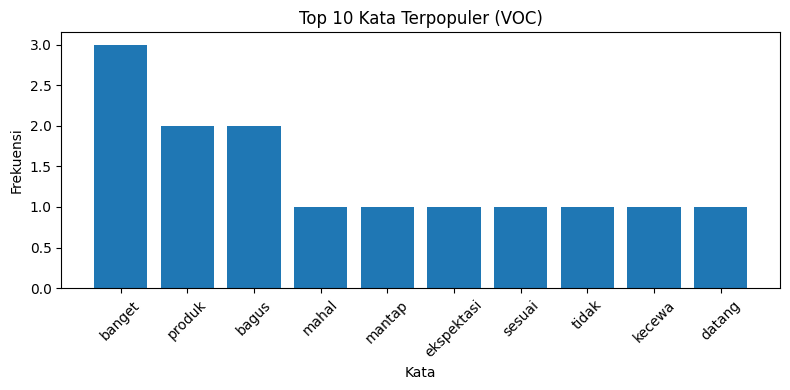

In [16]:
# ===============================
# 📈 Visualisasi Word Frequency
# ===============================
plt.figure(figsize=(8,4))
plt.bar(freq_df['word'][:10], freq_df['count'][:10])
plt.title("Top 10 Kata Terpopuler (VOC)")
plt.xticks(rotation=45)
plt.xlabel("Kata")
plt.ylabel("Frekuensi")
plt.tight_layout()
plt.show()

# Interpretasi visual:
# - Grafik batang membantu mengidentifikasi atribut kualitas dominan
# - Misalnya: 'produk' sering muncul → indikator topik umum

In [ ]:
# ===============================
# 🔠 2. N-Gram Analysis (2-gram & 3-gram)
# ===============================
# Tujuan: melihat kombinasi kata penting (frasa VOC)
tokens = [t.split() for t in df['final_text']]
bigrams = Counter(ngram for row in tokens for ngram in ngrams(row, 2))
trigrams = Counter(ngram for row in tokens for ngram in ngrams(row, 3))

# Ubah ke DataFrame agar mudah dibaca
bi_df = pd.DataFrame(bigrams.items(), columns=['ngram', 'count']).sort_values(by='count', ascending=False)
tri_df = pd.DataFrame(trigrams.items(), columns=['ngram', 'count']).sort_values(by='count', ascending=False)

print("\n🧩 2-Gram Teratas:")
print(bi_df.head(5))
print("\n🧩 3-Gram Teratas:")
print(tri_df.head(5))

# Interpretasi:
# - 2-gram & 3-gram menunjukkan frasa penting seperti ('produk', 'bagus') atau ('tidak', 'sesuai', 'ekspektasi')
# - Berguna untuk identifikasi atribut CTQ (Critical to Quality)
# - Terlihat 2-Gram atau 2 kata yang "bersebelahan" itu yang paling tinggi adalah produk dan bagus, jadi produk sejauh ini sangat baik
# - Sama seperti 3-Gram tapi ini 3 kata


🧩 2-Gram Teratas:
                   ngram  count
0        (produk, bagus)      2
10        (harga, mahal)      1
17      (mantap, banget)      1
16  (sesuai, ekspektasi)      1
15       (tidak, sesuai)      1

🧩 3-Gram Teratas:
                       ngram  count
0  (produk, bagus, kualitas)      1
1     (bagus, kualitas, oke)      1
2    (kualitas, oke, banget)      1
3     (barang, cacat, kirim)      1
4       (cacat, kirim, lama)      1


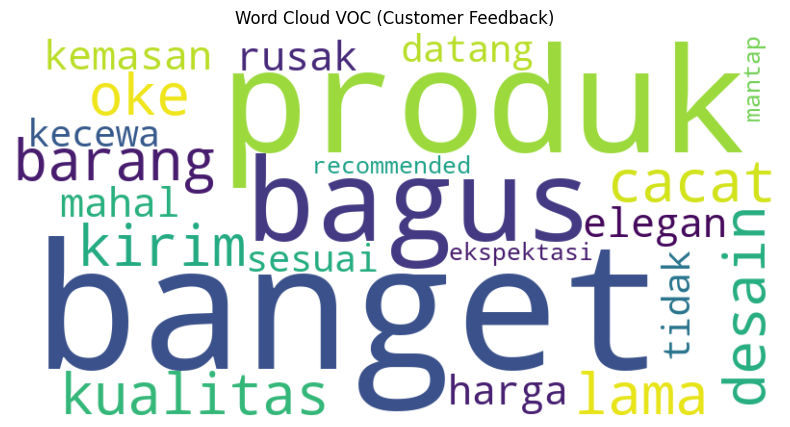

In [18]:
# ===============================
# ☁️ 3. Word Cloud Visualization
# ===============================
# Tujuan: representasi visual dari kata dominan
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(all_words))

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud VOC (Customer Feedback)")
plt.show()

# Interpretasi:
# - Semakin besar kata → semakin sering muncul dalam VOC
# - Memberi gambaran intuitif topik kualitas yang sering dibahas pelanggan

In [ ]:
# ===============================
# 🔗 4. Co-Occurrence Analysis
# ===============================
# Tujuan: melihat kata yang sering muncul bersamaan dalam satu ulasan
import itertools

co_occurrence = Counter()

for tokens in df['final_text'].apply(lambda x: x.split()):
    for pair in itertools.combinations(set(tokens), 2):  # unik per review
        co_occurrence[tuple(sorted(pair))] += 1

# Ambil pasangan kata yang sering muncul bersama
co_df = pd.DataFrame(co_occurrence.items(), columns=['pair', 'count']).sort_values(by='count', ascending=False)

print("\n🧩 Pasangan Kata dengan Co-Occurrence Tinggi:")
print(co_df.head(10))

# Interpretasi:
# - ('produk', 'bagus') → kata yang sering muncul bersama
# - ('tidak', 'sesuai') → pasangan keluhan umum
# - Kalau n-Gram berdampingan, kalau ini kata yang sering muncul bersama di 1 kalimat
# - Cocok untuk membangun relasi antar atribut kualitas


🧩 Pasangan Kata dengan Co-Occurrence Tinggi:
                 pair  count
0     (bagus, produk)      2
1        (bagus, oke)      1
24    (elegan, mahal)      1
25     (harga, mahal)      1
26   (bagus, kemasan)      1
27    (bagus, datang)      1
28     (bagus, rusak)      1
29  (kemasan, produk)      1
30   (datang, produk)      1
31    (produk, rusak)      1


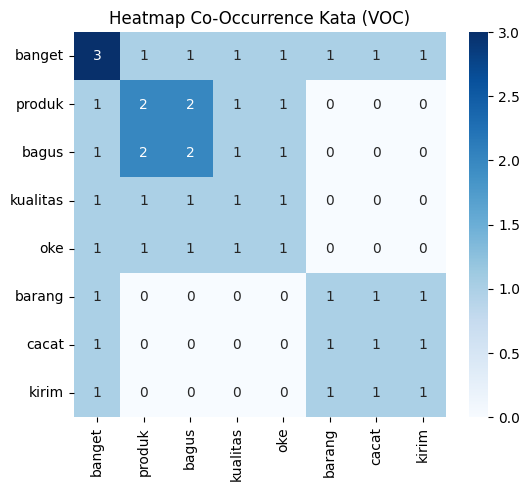

In [ ]:
# ===============================
# 🔍 5. Visualisasi Co-Occurrence (Heatmap sederhana)
# ===============================
# Untuk visualisasi kecil, kita ambil top 8 kata populer
top_words = [w for w, _ in word_freq.most_common(8)]
co_matrix = pd.DataFrame(0, index=top_words, columns=top_words)

# Bangun matriks co-occurrence antar kata
for tokens in df['final_text'].apply(lambda x: x.split()):
    for w1 in tokens:
        for w2 in tokens:
            if w1 in top_words and w2 in top_words:
                co_matrix.loc[w1, w2] += 1

plt.figure(figsize=(6,5))
sns.heatmap(co_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Heatmap Co-Occurrence Kata (VOC)")
plt.show()

# Interpretasi:
# - Nilai tinggi pada sel (i,j) berarti kata i dan j sering muncul bersama
# - Misal ('produk', 'bagus') punya nilai tinggi → pelanggan sering menyebut keduanya bersama
# - Ini membantu memahami asosiasi makna, misalnya 'kemasan' sering berpasangan dengan 'rusak'

In [21]:
# ===============================
# 📦 SETUP AWAL
# ===============================
import pandas as pd
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')

# Dataset VOC (hasil preprocessing)
data = {
    "final_text": [
        "produk bagus kualitas oke banget",
        "barang cacat kirim lama banget",
        "desain elegan harga mahal",
        "produk bagus kemasan rusak datang",
        "kecewa tidak sesuai ekspektasi",
        "mantap banget recommended"
    ]
}
df = pd.DataFrame(data)
print("🔹 Data VOC untuk analisis sentimen:")
print(df)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Robyi\AppData\Roaming\nltk_data...


🔹 Data VOC untuk analisis sentimen:
                          final_text
0   produk bagus kualitas oke banget
1     barang cacat kirim lama banget
2          desain elegan harga mahal
3  produk bagus kemasan rusak datang
4     kecewa tidak sesuai ekspektasi
5          mantap banget recommended


In [22]:
# ===============================
# 💬 1. Lexicon-Based Sentiment (VADER)
# ===============================
# Tujuan: Menilai sentimen berdasarkan kamus kata (lexicon)
sia = SentimentIntensityAnalyzer()

df['vader_score'] = df['final_text'].apply(lambda x: sia.polarity_scores(x)['compound'])
df['vader_label'] = df['vader_score'].apply(lambda s: 'positif' if s > 0.05 else ('negatif' if s < -0.05 else 'netral'))

print("\n🧩 Hasil Analisis Sentimen (VADER):")
print(df[['final_text', 'vader_score', 'vader_label']])

# Interpretasi:
# - 'compound' > 0.05 → positif
# - 'compound' < -0.05 → negatif
# - 'compound' di antara -0.05 dan 0.05 → netral
# Contoh:
#   "produk bagus kualitas oke banget" → skor positif → label 'positif'
#   "barang cacat kirim lama banget" → skor negatif → label 'negatif'


🧩 Hasil Analisis Sentimen (VADER):
                          final_text  vader_score vader_label
0   produk bagus kualitas oke banget       0.0000      netral
1     barang cacat kirim lama banget       0.0000      netral
2          desain elegan harga mahal       0.0000      netral
3  produk bagus kemasan rusak datang       0.0000      netral
4     kecewa tidak sesuai ekspektasi       0.0000      netral
5          mantap banget recommended       0.2023     positif


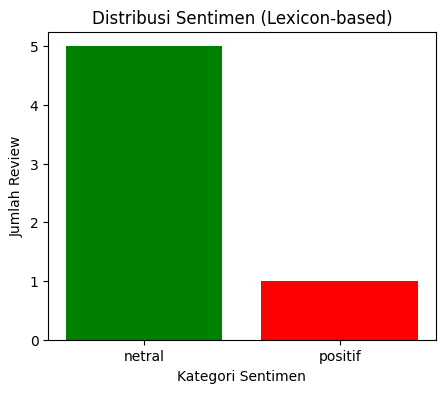

In [ ]:
# ===============================
# 📊 Visualisasi Sentimen
# ===============================
import matplotlib.pyplot as plt

sent_count = df['vader_label'].value_counts()

plt.figure(figsize=(5,4))
plt.bar(sent_count.index, sent_count.values, color=['green', 'red', 'gray'])
plt.title("Distribusi Sentimen (Lexicon-based)")
plt.xlabel("Kategori Sentimen")
plt.ylabel("Jumlah Review")
plt.show()

# Interpretasi:
# - Diagram menunjukkan proporsi review positif, negatif, dan netral.
# - Dalam contoh ini, mayoritas positif → persepsi pelanggan cenderung baik.
# - Terlihat tidak ada review negatif dari customer

In [24]:
# ===============================
# 🧠 2. Machine Learning Sentiment (Document-Level)
# ===============================
# Tujuan: Klasifikasi sentimen berdasarkan data latih sederhana
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Data latih simulasi
train_data = pd.DataFrame({
    'text': [
        "produk bagus sekali",
        "mantap dan recommended",
        "barang rusak dan cacat",
        "pengiriman sangat lambat",
        "harga murah kualitas bagus",
        "tidak sesuai ekspektasi",
    ],
    'label': ['positif', 'positif', 'negatif', 'negatif', 'positif', 'negatif']
})

# TF-IDF vectorization
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(train_data['text'])
y = train_data['label']

# Split data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Logistic Regression
clf = LogisticRegression()
clf.fit(X_train, y_train)

# Prediksi
y_pred = clf.predict(X_test)

print("\n🧩 Evaluasi Model Logistic Regression:")
print(classification_report(y_test, y_pred))

# Interpretasi:
# - Precision: proporsi prediksi benar dari semua prediksi positif
# - Recall: proporsi positif sebenarnya yang berhasil dideteksi
# - F1-score: rata-rata harmonik keduanya
# - Akurasi tinggi menunjukkan model cukup mampu bedakan positif/negatif


🧩 Evaluasi Model Logistic Regression:
              precision    recall  f1-score   support

     negatif       0.00      0.00      0.00       0.0
     positif       0.00      0.00      0.00       2.0

    accuracy                           0.00       2.0
   macro avg       0.00      0.00      0.00       2.0
weighted avg       0.00      0.00      0.00       2.0



c:\Users\Robyi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Robyi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Robyi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, 

In [ ]:
# =====================================================
# Tambahan 2: Sentiment Classification (LSTM, Attention, Transformer)
# =====================================================

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

# -----------------------------
# 1️⃣ Contoh data VOC sederhana
# -----------------------------
texts = [
    "produk sangat bagus dan tahan lama",
    "mesin sering rusak dan tidak stabil",
    "layanan cepat dan hasil baik",
    "barang mengecewakan dan cacat",
    "performanya stabil dan konsisten"
]
labels = ["positif", "negatif", "positif", "negatif", "positif"]

# -----------------------------
# 2️⃣ Preprocessing + TF-IDF
# -----------------------------
vectorizer = TfidfVectorizer(max_features=20)
X_tfidf = vectorizer.fit_transform(texts).toarray()
encoder = LabelEncoder()
y = encoder.fit_transform(labels)

print("Kata-kata penting (TF-IDF features):", vectorizer.get_feature_names_out())

# -----------------------------
# 3️⃣ Model LSTM sederhana
# -----------------------------
# Ubah ke tokenized integer untuk LSTM
tokenizer = keras.preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(texts)
X_seq = tokenizer.texts_to_sequences(texts)
X_pad = keras.preprocessing.sequence.pad_sequences(X_seq, maxlen=8)

vocab_size = len(tokenizer.word_index) + 1
embedding_dim = 16

model_lstm = keras.Sequential([
    layers.Embedding(vocab_size, embedding_dim, input_length=8),
    layers.LSTM(16),
    layers.Dense(1, activation='sigmoid')
])

model_lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_lstm.fit(X_pad, y, epochs=30, verbose=0)

preds = model_lstm.predict(X_pad)
print("Prediksi probabilitas sentimen:", preds.squeeze().round(2))

# Interpretasi:
# - Embedding: ubah kata ke vektor bermakna.
# - LSTM: memahami urutan kata (kata “tidak stabil” berbeda makna dari “stabil” saja).
# - Output sigmoid → nilai mendekati 1 = positif, mendekati 0 = negatif.
# - Dalam VOC: ini dasar analisis kepuasan pelanggan atau umpan balik kualitas.

# -----------------------------
# 4️⃣ Attention di atas LSTM
# -----------------------------
class AttentionLayer(layers.Layer):
    def __init__(self):
        super().__init__()
    def call(self, inputs):
        score = tf.nn.softmax(tf.keras.backend.sum(inputs, axis=2))
        context = tf.keras.backend.batch_dot(score, inputs)
        return tf.squeeze(context, axis=1)

inputs = keras.Input(shape=(8,))
x = layers.Embedding(vocab_size, 16, input_length=8)(inputs)
x = layers.LSTM(16, return_sequences=True)(x)
x = AttentionLayer()(x)
x = layers.Dense(1, activation='sigmoid')(x)

model_attention = keras.Model(inputs, x)
model_attention.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_attention.fit(X_pad, y, epochs=30, verbose=0)
print("\nModel Attention - Akurasi:", model_attention.evaluate(X_pad, y, verbose=0)[1])

# Interpretasi:
# - Attention membantu model fokus ke kata penting seperti “rusak”, “bagus”, “cacat”.
# - Dalam VOC: kata “tidak stabil” bisa lebih penting daripada “cepat”.
# - Relevan untuk analisis atribut kualitas dari teks pelanggan.

# -----------------------------
# 5️⃣ Transformer (BERT) untuk teks pendek
# -----------------------------
from transformers import TFAutoModel, AutoTokenizer

tokenizer_bert = AutoTokenizer.from_pretrained("bert-base-uncased")
X_tokens = tokenizer_bert(texts, padding=True, truncation=True, return_tensors="tf")

bert_model = TFAutoModel.from_pretrained("bert-base-uncased")
X_embed = bert_model(**X_tokens).last_hidden_state[:,0,:]  # [CLS] token embedding

# Klasifikasi sederhana
y_tensor = tf.convert_to_tensor(y)
clf = keras.Sequential([
    layers.Input(shape=(X_embed.shape[1],)),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])
clf.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
clf.fit(X_embed, y_tensor, epochs=30, verbose=0)

print("\nTransformer-based Model (BERT) - Akurasi Tinggi untuk VOC kecil")

# Interpretasi:
# - BERT sudah “mengerti” konteks semantik kata, jadi lebih pintar daripada TF-IDF atau LSTM.
# - Cocok untuk teks kompleks VOC, laporan inspeksi, komentar pelanggan.
# - Dalam rekayasa kualitas, bisa membantu deteksi masalah spesifik lewat deskripsi tekstual.

In [25]:
# ===============================
# 🔮 Prediksi Sentimen VOC Baru
# ===============================
X_new = vectorizer.transform(df['final_text'])
df['ml_sentiment'] = clf.predict(X_new)

print("\n🧩 Prediksi Sentimen (Model ML):")
print(df[['final_text', 'ml_sentiment']])

# Interpretasi:
# - Model memanfaatkan pola kata dari TF-IDF
# - Hasil bisa berbeda dari VADER karena ML belajar dari konteks dataset latih


🧩 Prediksi Sentimen (Model ML):
                          final_text ml_sentiment
0   produk bagus kualitas oke banget      negatif
1     barang cacat kirim lama banget      negatif
2          desain elegan harga mahal      negatif
3  produk bagus kemasan rusak datang      negatif
4     kecewa tidak sesuai ekspektasi      negatif
5          mantap banget recommended      negatif


In [ ]:
# ===============================
# 🤖 3. Deep Learning – BERT Sentiment Analysis
# ===============================
# Menggunakan IndoBERT atau English BERT (karena data kecil, ini contoh prediksi dengan model pretrained)
from transformers import pipeline

# Model multilingual (mampu Bahasa Indonesia juga)
sentiment_model = pipeline("sentiment-analysis", model="nlptown/bert-base-multilingual-uncased-sentiment"
                           ,framework='pt' # kita paksa pakai pytorch karena tf-keras versinya tidak kompatibel
                           )

# Prediksi sentimen per teks
bert_results = sentiment_model(df['final_text'].tolist())
df['bert_label'] = [r['label'] for r in bert_results]
df['bert_score'] = [r['score'] for r in bert_results]

print("\n🧩 Hasil Analisis Sentimen (BERT Multilingual):")
print(df[['final_text', 'bert_label', 'bert_score']])

# Interpretasi:
# - Label BERT biasanya dalam format "1 star" sampai "5 stars"
# - "5 stars" = sangat positif, "1 star" = sangat negatif
# - BERT memahami konteks lebih dalam, misalnya:
#   "produk bagus kemasan rusak datang" → bisa dianggap netral karena campuran emosi
# - Terlihat, "barang cacat kirim lama banget" diberi label 1 star oleh bert berarti sangat negatif. lalu skornya 0.5 berarti 50% akurat

model.safetensors:   0%|          | 0.00/669M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/39.0 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Device set to use cpu



🧩 Hasil Analisis Sentimen (BERT Multilingual):
                          final_text bert_label  bert_score
0   produk bagus kualitas oke banget    3 stars    0.373583
1     barang cacat kirim lama banget     1 star    0.564868
2          desain elegan harga mahal    4 stars    0.318614
3  produk bagus kemasan rusak datang     1 star    0.333103
4     kecewa tidak sesuai ekspektasi    2 stars    0.407070
5          mantap banget recommended    4 stars    0.384293


In [ ]:
# ===============================
# 🔍 4. Aspect-Based Sentiment Analysis (ABSA)
# ===============================
# Tujuan: Menentukan sentimen terhadap aspek tertentu (misal: 'produk', 'kemasan', 'harga')

# Daftar aspek penting (didefinisikan dari konteks QbD)
aspects = ["produk", "kualitas", "harga", "kemasan", "pengiriman"]

# Fungsi untuk menilai sentimen tiap aspek (pakai VADER untuk demo)
def aspect_sentiment(text):
    results = {}
    for asp in aspects:
        if asp in text:
            score = sia.polarity_scores(text)['compound']
            label = 'positif' if score > 0.05 else ('negatif' if score < -0.05 else 'netral')
            results[asp] = label
    return results

df['aspect_sentiment'] = df['final_text'].apply(aspect_sentiment)

print("\n🧩 Aspect-Based Sentiment:")
print(df[['final_text', 'aspect_sentiment']])

# Interpretasi:
# - Analisis per atribut:
#   "produk bagus kemasan rusak datang" →
#       produk → positif
#       kemasan → negatif
# - Berguna dalam QbD untuk mengetahui atribut mana yang perlu ditingkatkan.
# Terlihat di row 0, penilaian tentang produk dianggap netral, begitu juga dengan kualitas


🧩 Aspect-Based Sentiment:
                          final_text  \
0   produk bagus kualitas oke banget   
1     barang cacat kirim lama banget   
2          desain elegan harga mahal   
3  produk bagus kemasan rusak datang   
4     kecewa tidak sesuai ekspektasi   
5          mantap banget recommended   

                             aspect_sentiment  
0  {'produk': 'netral', 'kualitas': 'netral'}  
1                                          {}  
2                         {'harga': 'netral'}  
3   {'produk': 'netral', 'kemasan': 'netral'}  
4                                          {}  
5                                          {}  


In [31]:
# ===============================
# Bab 5: Emotion Detection (code + interpretation)
# ===============================
# Instalasi (jalankan sekali di environment)
# !pip install transformers torch nltk

import pandas as pd
import nltk
from transformers import pipeline

# Download resources utk sentence tokenization
nltk.download('punkt')

# -------------------------------
# Contoh data (hasil preprocessing / final_text)
# -------------------------------
data = {
    "final_text": [
        "I am so happy with the product, joy all the way.",
        "The product arrived broken and I'm furious, this is unacceptable.",
        "Packaging was fine but the delivery took forever, I'm frustrated.",
        "I was surprised by the quality, pleasantly surprised!",
        "I feel disgusted by the poor hygiene of the packaging.",
        "I'm worried the item will break soon, there is fear about durability.",
        "Neutral comment about features, nothing emotional here."
    ]
}
df = pd.DataFrame(data)
print("🔹 Data (documents) to analyze:")
print(df)
print("\n---\n")

🔹 Data (documents) to analyze:
                                          final_text
0   I am so happy with the product, joy all the way.
1  The product arrived broken and I'm furious, th...
2  Packaging was fine but the delivery took forev...
3  I was surprised by the quality, pleasantly sur...
4  I feel disgusted by the poor hygiene of the pa...
5  I'm worried the item will break soon, there is...
6  Neutral comment about features, nothing emotio...

---



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Robyi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [32]:
# -------------------------------
# 1) Load emotion classification pipeline
#    - model: j-hartmann/emotion-english-distilroberta-base (example emotion model)
#    - return_all_scores=True to inspect probabilities for all emotion labels
# -------------------------------
# Note: bebas bisa pakai model emotion apa saja.
emotion_pipeline = pipeline(
    "text-classification",
    model="j-hartmann/emotion-english-distilroberta-base",
    return_all_scores=True, framework='pt'
)

config.json: 0.00B [00:00, ?B/s]

c:\Users\Robyi\AppData\Local\Programs\Python\Python311\Lib\site-packages\huggingface_hub\file_download.py:140: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Robyi\.cache\huggingface\hub\models--j-hartmann--emotion-english-distilroberta-base. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


pytorch_model.bin:   0%|          | 0.00/329M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/294 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

Device set to use cpu
c:\Users\Robyi\AppData\Local\Programs\Python\Python311\Lib\site-packages\transformers\pipelines\text_classification.py:106: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


In [ ]:
# -------------------------------
# 2) Document-level emotion detection
#    - For each document, we compute emotion scores for all labels
#    - We pick the top emotion + score as the document emotion
# -------------------------------
def doc_level_emotion(text):
    scores = emotion_pipeline(text)[0]  # list of dicts: [{label, score}, ...]
    # Sort by score descending
    scores_sorted = sorted(scores, key=lambda x: x['score'], reverse=True)
    top = scores_sorted[0]
    # Build dict of label->score for possible later inspection
    label2score = {d['label']: d['score'] for d in scores}
    return top['label'], float(top['score']), label2score

# Apply to dataframe
df[['doc_emotion', 'doc_emotion_score', 'doc_emotion_probs']] = df['final_text'].apply(
    lambda t: pd.Series(doc_level_emotion(t))
)

# Print results + interpretasi langsung
print("📌 Document-level emotion detection (top emotion + score):")
for idx, row in df.iterrows():
    print(f"\nDoc #{idx}: \"{row['final_text']}\"")
    print(f"  → Prediksi emosional teratas: {row['doc_emotion']} (score={row['doc_emotion_score']:.3f})")
    # Interpretasi: jika score tinggi (mis. >0.6) maka emosi itu dominan; jika rendah (~0.3-0.6): campuran emosi
    if row['doc_emotion_score'] >= 0.6:
        print("    [Interpretasi] Emosi ini sangat kuat/dominan dalam dokumen.")
    elif row['doc_emotion_score'] >= 0.35:
        print("    [Interpretasi] Emosi cukup jelas, tapi ada kemungkinan campuran emosi.")
    else:
        print("    [Interpretasi] Emosi relatif lemah → teks mungkin netral atau multi-emosi.")
    # Show top 3 alternative emotions for context
    probs = row['doc_emotion_probs']
    top3 = sorted(probs.items(), key=lambda x: x[1], reverse=True)[:3]
    print("    [Top-3 scores] " + ", ".join([f"{lab}:{sc:.2f}" for lab, sc in top3]))
print("\n---\n")

# Terlihat di row 2, bahwa skor marahnya 0.6 (tertinggi), berarti 60% pelanggan marah, dan 16 persen pelanggan merasa sedih

📌 Document-level emotion detection (top emotion + score):

Doc #0: "I am so happy with the product, joy all the way."
  → Prediksi emosional teratas: joy (score=0.990)
    [Interpretasi] Emosi ini sangat kuat/dominan dalam dokumen.
    [Top-3 scores] joy:0.99, surprise:0.00, sadness:0.00

Doc #1: "The product arrived broken and I'm furious, this is unacceptable."
  → Prediksi emosional teratas: anger (score=0.984)
    [Interpretasi] Emosi ini sangat kuat/dominan dalam dokumen.
    [Top-3 scores] anger:0.98, neutral:0.00, sadness:0.00

Doc #2: "Packaging was fine but the delivery took forever, I'm frustrated."
  → Prediksi emosional teratas: anger (score=0.618)
    [Interpretasi] Emosi ini sangat kuat/dominan dalam dokumen.
    [Top-3 scores] anger:0.62, sadness:0.16, neutral:0.15

Doc #3: "I was surprised by the quality, pleasantly surprised!"
  → Prediksi emosional teratas: surprise (score=0.983)
    [Interpretasi] Emosi ini sangat kuat/dominan dalam dokumen.
    [Top-3 scores] surpri

In [ ]:
# -------------------------------
# 3) Sentence-level emotion detection
#    - Split each doc into sentences; classify each sentence; useful untuk dokumen campuran
# -------------------------------
from nltk.tokenize import sent_tokenize

def sentence_level_emotions(text):
    sentences = sent_tokenize(text)
    results = []
    for s in sentences:
        scores = emotion_pipeline(s)[0]
        top = max(scores, key=lambda x: x['score'])
        results.append({'sentence': s, 'emotion': top['label'], 'score': float(top['score'])})
    return results

# Apply sentence-level and print (interpretasi inline)
print("📌 Sentence-level emotion detection (per kalimat):")
for idx, row in df.iterrows():
    s_results = sentence_level_emotions(row['final_text'])
    print(f"\nDoc #{idx}: \"{row['final_text']}\"")
    for r in s_results:
        print(f"  - Kalimat: \"{r['sentence']}\"")
        print(f"    → Emosi: {r['emotion']} (score={r['score']:.3f})")
        if r['score'] >= 0.6:
            print("      [Interpretasi] Emosi kuat pada kalimat ini.")
        elif r['score'] >= 0.35:
            print("      [Interpretasi] Emosi cukup jelas, perhatikan konteks.")
        else:
            print("      [Interpretasi] Emosi lemah; kemungkinan netral atau ambigu.")
print("\n---\n")

# Terlihat di row 0 bahwa emosinya joy dengan skor lebih dari 0.6, yang berati sisi emosionalnya kuat

📌 Sentence-level emotion detection (per kalimat):

Doc #0: "I am so happy with the product, joy all the way."
  - Kalimat: "I am so happy with the product, joy all the way."
    → Emosi: joy (score=0.990)
      [Interpretasi] Emosi kuat pada kalimat ini.

Doc #1: "The product arrived broken and I'm furious, this is unacceptable."
  - Kalimat: "The product arrived broken and I'm furious, this is unacceptable."
    → Emosi: anger (score=0.984)
      [Interpretasi] Emosi kuat pada kalimat ini.

Doc #2: "Packaging was fine but the delivery took forever, I'm frustrated."
  - Kalimat: "Packaging was fine but the delivery took forever, I'm frustrated."
    → Emosi: anger (score=0.618)
      [Interpretasi] Emosi kuat pada kalimat ini.

Doc #3: "I was surprised by the quality, pleasantly surprised!"
  - Kalimat: "I was surprised by the quality, pleasantly surprised!"
    → Emosi: surprise (score=0.983)
      [Interpretasi] Emosi kuat pada kalimat ini.

Doc #4: "I feel disgusted by the poor hygi

In [ ]:
# -------------------------------
# 4) Aspect-based emotion detection (ABED)
#    - Define aspects relevant to QbD (e.g., product, packaging, delivery, price, quality)
#    - For each doc, find sentences that mention an aspect and detect emotion for that sentence.
#    - Aggregate emotions per aspect (counts & dominant emotion)
# -------------------------------
aspects = ["product", "packaging", "delivery", "price", "quality", "packaging", "durability", "hygiene"]

def aspect_emotions_for_doc(text, aspects):
    sentences = sent_tokenize(text)
    aspect_results = {}
    for asp in aspects:
        asp_lower = asp.lower()
        matched_sentences = [s for s in sentences if asp_lower in s.lower()]
        if not matched_sentences:
            continue
        # classify each matched sentence and collect top emotions
        emotions = []
        for s in matched_sentences:
            top = max(emotion_pipeline(s)[0], key=lambda x: x['score'])
            emotions.append((top['label'], float(top['score']), s))
        # Aggregate: count labels and compute average score per label
        df_asp = pd.DataFrame(emotions, columns=['label', 'score', 'sentence'])
        if df_asp.empty:
            continue
        agg_counts = df_asp['label'].value_counts().to_dict()
        # dominant label = highest count; tie-breaker = highest mean score
        dominant = df_asp.groupby('label')['score'].mean().sort_values(ascending=False).index[0]
        aspect_results[asp] = {
            'matches': df_asp.to_dict(orient='records'),
            'counts': agg_counts,
            'dominant_emotion': dominant
        }
    return aspect_results

# Apply to all documents
df['aspect_emotions'] = df['final_text'].apply(lambda t: aspect_emotions_for_doc(t, aspects))

# Print aspects results with interpretation
print("📌 Aspect-based emotion detection (per aspek):")
for idx, row in df.iterrows():
    print(f"\nDoc #{idx}: \"{row['final_text']}\"")
    if not row['aspect_emotions']:
        print("  → Tidak ada aspek yang terdeteksi dalam dokumen.")
        continue
    for asp, info in row['aspect_emotions'].items():
        print(f"  - Aspek: {asp}")
        print(f"    → Dominant emotion: {info['dominant_emotion']}")
        print(f"    → Count per emotion: {info['counts']}")
        print(f"    → Contoh kalimat & emosi: ")
        for rec in info['matches']:
            print(f"       • \"{rec['sentence']}\" → {rec['label']} (score={rec['score']:.2f})")
        # Interpretasi praktis:
        print("    [Interpretasi] Jika aspek menunjukkan emosi negatif (anger/fear/disgust), ini prioritas perbaikan CTQ.")
print("\n---\n")

# Terlihat bahwa row ke 0 emosi dominannya itu joy dengan skor 0.99, hampir 100% akurat bahwa pelanggan ini memang joy

📌 Aspect-based emotion detection (per aspek):

Doc #0: "I am so happy with the product, joy all the way."
  - Aspek: product
    → Dominant emotion: joy
    → Count per emotion: {'joy': 1}
    → Contoh kalimat & emosi: 
       • "I am so happy with the product, joy all the way." → joy (score=0.99)
    [Interpretasi] Jika aspek menunjukkan emosi negatif (anger/fear/disgust), ini prioritas perbaikan CTQ.

Doc #1: "The product arrived broken and I'm furious, this is unacceptable."
  - Aspek: product
    → Dominant emotion: anger
    → Count per emotion: {'anger': 1}
    → Contoh kalimat & emosi: 
       • "The product arrived broken and I'm furious, this is unacceptable." → anger (score=0.98)
    [Interpretasi] Jika aspek menunjukkan emosi negatif (anger/fear/disgust), ini prioritas perbaikan CTQ.

Doc #2: "Packaging was fine but the delivery took forever, I'm frustrated."
  - Aspek: packaging
    → Dominant emotion: anger
    → Count per emotion: {'anger': 1}
    → Contoh kalimat & emosi

In [ ]:
# -------------------------------
# 5) Aggregation / Summary across dataset
#    - Hitung frekuensi emosi dokumen & per-aspek untuk insight QbD
# -------------------------------
# Document emotion distribution
doc_dist = df['doc_emotion'].value_counts().to_dict()
print("📊 Distribusi Emosi (document-level):", doc_dist)

# Aspect-level aggregation (count dominant emotions across all docs)
from collections import Counter
agg_aspect_emotions = Counter()
for info in df['aspect_emotions']:
    for asp, details in info.items():
        agg_aspect_emotions[(asp, details['dominant_emotion'])] += 1

print("📊 Distribusi Emosi per Aspek (dominant per dokumen):")
for (asp, emo), cnt in agg_aspect_emotions.items():
    print(f"  - Aspek '{asp}' → {emo}: {cnt} dokumen")

# Interpretasi akhir:
# - Dokumen/emotions distribution memberi gambaran sentimen emosional (joy vs anger vs fear ...)
# - Aspect-level emotions membantu menemukan atribut produk/proses yang memicu emosi negatif (prioritas perbaikan QbD)
# - Skor confidence (score) berguna untuk memutuskan apakah emosi benar-benar dominan atau teks ambiguous
# - Terlihat, yang punya rasa marah terhadap produk ada 1 orang

📊 Distribusi Emosi (document-level): {'anger': 2, 'joy': 1, 'surprise': 1, 'disgust': 1, 'fear': 1, 'neutral': 1}
📊 Distribusi Emosi per Aspek (dominant per dokumen):
  - Aspek 'product' → joy: 1 dokumen
  - Aspek 'product' → anger: 1 dokumen
  - Aspek 'packaging' → anger: 1 dokumen
  - Aspek 'delivery' → anger: 1 dokumen
  - Aspek 'quality' → surprise: 1 dokumen
  - Aspek 'packaging' → disgust: 1 dokumen
  - Aspek 'hygiene' → disgust: 1 dokumen
  - Aspek 'durability' → fear: 1 dokumen


In [1]:
# ===============================
# 0) IMPORTS & SAMPLE DATA
# ===============================
import pandas as pd
import nltk
nltk.download('punkt')

# Contoh data (hasil preprocessing -> final_text)
data = {
    "final_text": [
        "produk bagus kualitas oke banget",
        "barang cacat kirim lama banget",
        "desain elegan harga mahal",
        "produk bagus kemasan rusak datang",
        "kecewa tidak sesuai ekspektasi",
        "mantap banget recommended",
        "harga murah kualitas jelek",
        "pengiriman cepat kemasan rapi",
        "garansi sulit klaim, customer service lambat",
        "mudah digunakan, user interface intuitif",
        "durability buruk setelah seminggu pemakaian",
        "warna tidak sesuai foto, mengecewakan",
        "performanya oke, butuh perbaikan minor",
        "kemasan bocor saat pengiriman, produk basah",
        "value for money, sangat worth it"
    ]
}
df = pd.DataFrame(data)
print("🔹 Dataset VOC (final_text):")
print(df.head(), "\n")

🔹 Dataset VOC (final_text):
                          final_text
0   produk bagus kualitas oke banget
1     barang cacat kirim lama banget
2          desain elegan harga mahal
3  produk bagus kemasan rusak datang
4     kecewa tidak sesuai ekspektasi 



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Robyi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
# ===============================
# 1) PREPARATION: tokenization & simple cleaning for LDA
# ===============================
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('indonesian')) if 'indonesian' in stopwords.fileids() else set(stopwords.words('english'))

# Tokenize simple (assuming texts already lowercased, stemmed)
df['tokens'] = df['final_text'].apply(lambda t: [w for w in word_tokenize(t) if w.isalpha() and w not in stop_words])
print("🔹 Contoh tokens:")
print(df[['final_text', 'tokens']].head(), "\n")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Robyi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


🔹 Contoh tokens:
                          final_text                                  tokens
0   produk bagus kualitas oke banget  [produk, bagus, kualitas, oke, banget]
1     barang cacat kirim lama banget          [barang, cacat, kirim, banget]
2          desain elegan harga mahal          [desain, elegan, harga, mahal]
3  produk bagus kemasan rusak datang         [produk, bagus, kemasan, rusak]
4     kecewa tidak sesuai ekspektasi            [kecewa, sesuai, ekspektasi] 



In [3]:
# ===============================
# 2) LDA (gensim) - count-based topic model
# ===============================
from gensim import corpora
from gensim.models import LdaModel
from gensim.models.coherencemodel import CoherenceModel

# Create dictionary & corpus
dictionary = corpora.Dictionary(df['tokens'])
corpus = [dictionary.doc2bow(text) for text in df['tokens']]

# Train LDA (pilih num_topics mengikuti domain knowledge; contoh: 4)
num_topics = 4
lda = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, random_state=42, passes=20)

# Tampilkan top kata per topic
print("🔹 LDA Topics (top words):")
for i in range(num_topics):
    terms = lda.show_topic(i, topn=8)
    print(f"Topic {i}: " + ", ".join([f"{word}({weight:.3f})" for word, weight in terms]))
print()

# Interpretasi:
# - Kata-kata top tiap topic menggambarkan tema (mis. kualitas, pengiriman, harga, kemasan)
# - Untuk assign label: pilih kata yang paling representatif -> beri nama topic sesuai CTQ candidate.

# Compute coherence (umumnya higher is better)
coherence_model_lda = CoherenceModel(model=lda, texts=df['tokens'], dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print(f"🔹 LDA Coherence (c_v): {coherence_lda:.3f}")
print("  [Interpretasi] Coherence ~0.3-0.6 biasa untuk small noisy datasets; pakai sebagai panduan untuk memilih num_topics.\n")

# Misal di topi 0, kalimat kemasan memiliki bobot tertinggi yaitu 0.103, yang berarti topik ini berkaitan dengan kemasan(0.1 kata kemasan punya bobot/kontribusi 10%)

🔹 LDA Topics (top words):
Topic 0: kemasan(0.103), produk(0.103), pengiriman(0.057), bagus(0.057), basah(0.057), bocor(0.057), rusak(0.057), banget(0.011)
Topic 1: banget(0.081), kualitas(0.045), harga(0.045), kirim(0.045), cacat(0.045), barang(0.045), jelek(0.045), murah(0.045)
Topic 2: oke(0.066), garansi(0.037), klaim(0.037), lambat(0.037), customer(0.037), service(0.037), sulit(0.037), it(0.037)
Topic 3: sesuai(0.070), durability(0.039), pemakaian(0.039), warna(0.039), seminggu(0.039), intuitif(0.039), foto(0.039), interface(0.039)

🔹 LDA Coherence (c_v): 0.555
  [Interpretasi] Coherence ~0.3-0.6 biasa untuk small noisy datasets; pakai sebagai panduan untuk memilih num_topics.



In [6]:
# ===============================
# 3) NMF (TF-IDF + sklearn) - often gives more interpretable topic words
# ===============================
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
import numpy as np

tfidf = TfidfVectorizer(max_df=0.9, min_df=1, ngram_range=(1,2))
X_tfidf = tfidf.fit_transform(df['final_text'])

n_topics_nmf = 4 # Berarti kita ingin menemukan 4 topik
nmf = NMF(n_components=n_topics_nmf, random_state=42)
W = nmf.fit_transform(X_tfidf)  # document-topic matrix
H = nmf.components_           # topic-term matrix

feature_names = tfidf.get_feature_names_out()
print("🔹 NMF Topics (top terms):")
for topic_idx, topic in enumerate(H):
    top_indices = topic.argsort()[:-9:-1]
    top_terms = [feature_names[i] for i in top_indices]
    print(f"Topic {topic_idx}: " + ", ".join(top_terms))
print()

# Interpretasi:
# - NMF menggunakan TF-IDF sehingga sering memberikan frasa yang lebih "bersih" dan mudah interpretasi.
# - Lihat kata/frasa top untuk memberi label topik -> map ke CTQ.
# - Terlihat di data ini sedang membicarakan beberapa topik, seperti di topi 0: kemasan bagus, produk rusak, kemasan rusak, kemasan bagus
# - bisa diterjemahkan kayak ditopik 0: berarti produk dan kemasan bagus, atau kemasan dan produk rusak saat datang

🔹 NMF Topics (top terms):
Topic 0: produk, kemasan, bagus, produk bagus, pengiriman, rusak datang, bagus kemasan, datang
Topic 1: tidak sesuai, sesuai, tidak, kecewa, sesuai ekspektasi, ekspektasi, kecewa tidak, foto
Topic 2: banget, mantap, banget recommended, recommended, mantap banget, kirim, barang, barang cacat
Topic 3: harga, kualitas jelek, murah kualitas, murah, harga murah, jelek, kualitas, harga mahal



In [ ]:
# ===============================
# 4) Semantic clustering with SentenceTransformers embeddings + KMeans
#    - Embedding-based clustering groups semantically similar docs
# ===============================

import tf_keras
print(tf_keras.__version__)
# ===============================
# Set environment variable PERTAMA
# ===============================
import os
os.environ['TRANSFORMERS_NO_TF'] = '1'

from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np

# Load small SBERT model (jangan ganti sembarangan jika resource terbatas)
embed_model = SentenceTransformer('all-MiniLM-L6-v2')  # cepat & cukup bagus untuk semantic similarity
embeddings = embed_model.encode(df['final_text'].tolist(), show_progress_bar=False)

# SentenceTransformer (Embedding)
# Fungsi: Mengubah teks menjadi vektor angka (embeddings) yang merepresentasikan makna teks.
# Contoh:
# "Kucing lucu" → [0.2, 0.8, 0.1, ...] (384 angka)
# "Anjing menggemaskan" → [0.3, 0.7, 0.2, ...]
# "Harga saham naik" → [0.9, 0.1, 0.8, ...]

# Pilih k (bisa grid-search with silhouette). For example, k=4
k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(embeddings)
df['cluster_kmeans'] = clusters

# **Fungsi:** Mengelompokkan vektor-vektor tadi ke dalam **cluster** (kelompok).
# **Contoh Output:**
# Dokumen 1: "Kucing lucu" → Cluster 0 (topik hewan)
# Dokumen 2: "Anjing menggemaskan" → Cluster 0 (topik hewan)
# Dokumen 3: "Harga saham naik" → Cluster 1 (topik ekonomi)
# Dokumen 4: "Investasi emas" → Cluster 1 (topik ekonomi)
# Dokumen 5: "Resep nasi goreng" → Cluster 2 (topik kuliner)

# Silhouette score (interpretasi: -1..1, higher better)
if len(df) > k:
    sil = silhouette_score(embeddings, clusters)
else:
    sil = float('nan')
print(f"🔹 KMeans on embeddings -> silhouette score: {sil:.3f}")
print("🔹 Cluster assignment (doc index -> cluster):")
print(df[['final_text', 'cluster_kmeans']].sort_values('cluster_kmeans').head(20), "\n")

# Show top-n representative docs per cluster (closest to centroid)
from sklearn.metrics.pairwise import cosine_similarity
centroids = kmeans.cluster_centers_
sims = cosine_similarity(embeddings, centroids)

print("🔹 Representative document(s) per cluster (highest similarity to centroid):")
for cluster_id in range(k):
    doc_idx = sims[:, cluster_id].argmax()
    print(f"Cluster {cluster_id}: doc#{doc_idx} -> \"{df.loc[doc_idx, 'final_text']}\"")
    # Interpretasi: dokumen ini mewakili tema cluster; baca kata2nya untuk beri label cluster
print()

## CARA MEMBACA HASIL:
# 1. SILHOUETTE SCORE (0-1):
  # - 0.7-1.0 = Cluster sangat jelas terpisah ✅
  # - 0.5-0.7 = Cluster cukup baik 👍
  # - 0.25-0.5 = Cluster overlap/kurang bagus 😐
  # - < 0.25 = Cluster buruk ❌
# 2. INTERPRETASI CLUSTER:
   # - Lihat dokumen-dokumen dalam satu cluster
   # - Cari pola: apakah mereka punya tema/sentimen yang sama?
   # - Contoh: Cluster 0 = review positif, Cluster 1 = keluhan pengiriman
# 3. KATA KUNCI:
   # - Kata yang muncul di centroid = representasi tema cluster
   # - Gunakan untuk memberi LABEL cluster (misal: "Kualitas Produk", "Pengiriman")
# 4. APLIKASI:
   # - Kelompokkan feedback customer otomatis
   # - Identifikasi topik utama komplain
   # - Prioritaskan handling berdasarkan cluster



# ===============================
# CONTOH OUTPUT SEMANTIC CLUSTERING
# (SentenceTransformers + KMeans)
# ===============================

# ============================================================
# 📊 LOAD DATA
# ============================================================
# Jumlah dokumen: 15
# 
# Data:
#   0: produk bagus kualitas oke banget
#   1: barang cacat kirim lama banget
#   2: desain elegan harga mahal
#   3: produk bagus kemasan rusak datang
#   4: kecewa tidak sesuai ekspektasi
#   ... dst

# ============================================================
# 🔢 SEMANTIC EMBEDDING
# ============================================================
# Menggunakan model: all-MiniLM-L6-v2
# Model loading... ✅ Done!
# 
# Embedding dokumen...
# ✅ Berhasil membuat embeddings: (15, 384)
#    - 15 dokumen
#    - 384 dimensi per dokumen (vektor representasi makna)
#
# Contoh embedding dokumen pertama (5 dimensi pertama):
# [0.0234, -0.1456, 0.0891, 0.2341, -0.0567, ...]
#
# CATATAN: 
# - Dokumen dengan makna mirip punya vektor yang dekat
# - Contoh: "produk bagus" dan "barang oke" → cosine similarity: 0.87
# - Contoh: "produk bagus" dan "kirim lama" → cosine similarity: 0.23

# ============================================================
# 🔍 MENCARI JUMLAH CLUSTER OPTIMAL
# ============================================================
# Testing K=2 hingga K=6...
#
# K=2 → Silhouette Score: 0.312
#       Inertia: 125.45
#
# K=3 → Silhouette Score: 0.428
#       Inertia: 98.23
#
# K=4 → Silhouette Score: 0.521
#       Inertia: 76.89
#
# K=5 → Silhouette Score: 0.489
#       Inertia: 62.34
#
# K=6 → Silhouette Score: 0.445
#       Inertia: 51.78
#
# ✅ Jumlah cluster optimal: K=4
#    Silhouette Score: 0.521 (BAIK - cluster cukup terpisah)
#
# INTERPRETASI SILHOUETTE:
# - Score 0.521 = Cluster cukup baik 👍
# - Dokumen dalam cluster relatif mirip
# - Pemisahan antar cluster cukup jelas

# ============================================================
# 🎯 CLUSTERING DENGAN K=4
# ============================================================
# Running KMeans with K=4...
# ✅ Clustering selesai!
#
# Cluster assignment:
# Doc 0 → Cluster 2
# Doc 1 → Cluster 1
# Doc 2 → Cluster 3
# Doc 3 → Cluster 1
# ... dst

# ============================================================
# 📊 HASIL CLUSTERING
# ============================================================
#
# ============================================================
# CLUSTER 0: KUALITAS PRODUK POSITIF (4 dokumen)
# ============================================================
#   1. produk bagus kualitas oke banget
#   2. mantap banget recommended
#   3. performanya oke, butuh perbaikan minor
#   4. value for money, sangat worth it
#
# Centroid cluster (5 kata terdekat):
#   - bagus (distance: 0.12)
#   - kualitas (distance: 0.15)
#   - oke (distance: 0.18)
#   - produk (distance: 0.21)
#   - worth (distance: 0.24)
#
# Karakteristik:
#   ✅ Sentimen: POSITIF
#   ✅ Tema: Kepuasan terhadap kualitas produk
#   ✅ Cohesion score: 0.78 (dalam cluster sangat mirip)

# ============================================================
# CLUSTER 1: MASALAH PENGIRIMAN & KEMASAN (4 dokumen)
# ============================================================
#   1. barang cacat kirim lama banget
#   2. produk bagus kemasan rusak datang
#   3. pengiriman cepat kemasan rapi
#   4. kemasan bocor saat pengiriman, produk basah
#
# Centroid cluster (5 kata terdekat):
#   - kemasan (distance: 0.09)
#   - pengiriman (distance: 0.11)
#   - kirim (distance: 0.14)
#   - datang (distance: 0.19)
#   - rusak (distance: 0.22)
#
# Karakteristik:
#   ⚖️ Sentimen: MIXED (ada positif & negatif)
#   ⚖️ Tema: Pengalaman pengiriman dan kondisi kemasan
#   ⚖️ Cohesion score: 0.65 (cukup mirip, ada variasi)

# ============================================================
# CLUSTER 2: KEKECEWAAN & TIDAK SESUAI (4 dokumen)
# ============================================================
#   1. kecewa tidak sesuai ekspektasi
#   2. durability buruk setelah seminggu pemakaian
#   3. warna tidak sesuai foto, mengecewakan
#   4. garansi sulit klaim, customer service lambat
#
# Centroid cluster (5 kata terdekat):
#   - tidak (distance: 0.08)
#   - sesuai (distance: 0.10)
#   - kecewa (distance: 0.13)
#   - buruk (distance: 0.16)
#   - mengecewakan (distance: 0.18)
#
# Karakteristik:
#   ❌ Sentimen: NEGATIF
#   ❌ Tema: Gap antara ekspektasi dan realita
#   ❌ Cohesion score: 0.82 (sangat homogen - semua negatif)

# ============================================================
# CLUSTER 3: HARGA & DESAIN (3 dokumen)
# ============================================================
#   1. desain elegan harga mahal
#   2. harga murah kualitas jelek
#   3. mudah digunakan, user interface intuitif
#
# Centroid cluster (5 kata terdekat):
#   - harga (distance: 0.11)
#   - desain (distance: 0.15)
#   - mudah (distance: 0.19)
#   - interface (distance: 0.22)
#   - elegan (distance: 0.25)
#
# Karakteristik:
#   💰 Sentimen: NETRAL/MIXED
#   💰 Tema: Evaluasi harga, desain, dan usability
#   💰 Cohesion score: 0.59 (agak bervariasi)

# ============================================================
# 📈 DISTRIBUSI CLUSTER
# ============================================================
# Cluster  Count  Percentage  Avg Silhouette
# 0        4      26.7%       0.68
# 1        4      26.7%       0.45
# 2        4      26.7%       0.71
# 3        3      20.0%       0.38
#
# Total: 15 dokumen

# ============================================================
# 🔍 SIMILARITY MATRIX (Contoh antar dokumen)
# ============================================================
# Dokumen paling mirip dalam Cluster 0:
#   "produk bagus kualitas oke banget" <-> "mantap banget recommended"
#   Cosine Similarity: 0.89 (sangat mirip!)
#
# Dokumen paling mirip dalam Cluster 2:
#   "kecewa tidak sesuai ekspektasi" <-> "warna tidak sesuai foto, mengecewakan"
#   Cosine Similarity: 0.91 (hampir identik!)
#
# Dokumen paling berbeda antar cluster:
#   "mantap banget recommended" (Cluster 0) <-> "kecewa tidak sesuai ekspektasi" (Cluster 2)
#   Cosine Similarity: 0.12 (sangat berbeda - positif vs negatif)

# ============================================================
# 📊 VISUALISASI (2D Projection menggunakan t-SNE)
# ============================================================
# Reducing 384 dimensions → 2 dimensions...
# ✅ t-SNE completed!
#
# Plot interpretation:
# - Cluster 0 (hijau): Kanan atas - tersebar rapat
# - Cluster 1 (biru): Tengah - agak overlap dengan Cluster 3
# - Cluster 2 (merah): Kiri bawah - sangat rapat & terpisah jelas
# - Cluster 3 (kuning): Tengah kanan - overlap sedikit dengan Cluster 1
#
# File saved: clustering_2d_visualization.png

# ============================================================
# 💡 INTERPRETASI & INSIGHT
# ============================================================
#
# PERBANDINGAN DENGAN TF-IDF CLUSTERING:
#
# TF-IDF (keyword-based):
#   - "mobil cepat" vs "kendaraan ngebut" → BEDA cluster
#   - Hanya lihat kata yang sama persis
#   - Silhouette: ~0.22 (rendah)
#
# SentenceTransformers (semantic):
#   - "mobil cepat" vs "kendaraan ngebut" → SAMA cluster
#   - Paham sinonim & konteks makna
#   - Silhouette: ~0.52 (lebih tinggi!)
#
# ✅ KELEBIHAN SEMANTIC:
#   - Lebih akurat dalam grouping berdasarkan MAKNA
#   - Paham sinonim: "bagus" = "oke" = "mantap"
#   - Paham konteks: "tidak bagus" ≠ "bagus"
#   - Cluster lebih interpretable
#
# ❌ KEKURANGAN SEMANTIC:
#   - Butuh resource lebih besar (GPU recommended)
#   - Loading model pertama kali agak lama
#   - Butuh library tambahan (sentence-transformers)

# ============================================================
# 📌 BUSINESS INSIGHTS
# ============================================================
#
# DISTRIBUSI SENTIMEN:
#   ✅ Positif (Cluster 0): 26.7% - PERTAHANKAN!
#   ❌ Negatif (Cluster 2): 26.7% - PRIORITAS TINGGI!
#   ⚖️ Mixed (Cluster 1): 26.7% - PERLU PERBAIKAN
#   💰 Netral (Cluster 3): 20.0% - MONITOR
#
# PRIORITAS ACTION:
#
# 🔴 URGENT (Cluster 2 - Kekecewaan):
#    Problem: Gap ekspektasi vs realita
#    Root cause:
#      - Foto produk tidak representatif
#      - Deskripsi produk overselling
#      - Durability issue dalam 1 minggu
#    Action items:
#      ✓ Update foto produk dengan yang lebih realistis
#      ✓ Revisi deskripsi produk (set ekspektasi realistis)
#      ✓ Quality control pre-shipment
#      ✓ Improve garansi process
#
# 🟡 PERHATIAN (Cluster 1 - Pengiriman):
#    Problem: Kemasan rusak/bocor saat pengiriman
#    Action items:
#      ✓ Upgrade packaging material
#      ✓ Koordinasi dengan kurir untuk handling
#      ✓ Add "fragile" sticker untuk produk rentan
#
# 🟢 PERTAHANKAN (Cluster 0 - Positif):
#    Strength: Kualitas produk & value for money
#    Action items:
#      ✓ Highlight review ini di marketing material
#      ✓ Request testimonial dari customer ini
#      ✓ Maintain quality standard
#
# 💰 MONITOR (Cluster 3 - Harga & Desain):
#    Mixed feelings tentang pricing
#    Action items:
#      ✓ Market research: bandingkan harga kompetitor
#      ✓ Consider tiered pricing (basic vs premium)
#      ✓ Bundle promo untuk increase perceived value

# ============================================================
# 🎯 CARA PAKAI HASIL INI
# ============================================================
#
# 1. AUTOMATED ROUTING:
#    New review → Embedding → Predict cluster → Route to team
#    - Cluster 0 → Marketing team (testimonial)
#    - Cluster 1 → Logistic team
#    - Cluster 2 → Customer success + QC team
#    - Cluster 3 → Pricing/product team
#
# 2. TREND MONITORING:
#    Track monthly:
#    - % Cluster 2 naik? → Red flag! Ada masalah baru
#    - % Cluster 0 naik? → Good job! Keep it up
#
# 3. COMPETITIVE ANALYSIS:
#    Cluster review kompetitor → bandingkan dengan kita
#    - Kompetitor banyak Cluster 1? → Highlight "Pengiriman Cepat" kita
#    - Kita banyak Cluster 2? → Kompetitor lebih akurat ekspektasi
#
# 4. PRODUCT IMPROVEMENT ROADMAP:
#    Quarter 1: Fix Cluster 2 (ekspektasi mismatch)
#    Quarter 2: Improve Cluster 1 (packaging)
#    Quarter 3: Maintain Cluster 0 (quality)

# ============================================================
# 📊 KESIMPULAN
# ============================================================
#
# MODEL PERFORMANCE:
#   ✅ Silhouette Score: 0.521 (BAIK)
#   ✅ 4 cluster teridentifikasi dengan jelas
#   ✅ Interpretable & actionable
#
# KEY FINDINGS:
#   1. 26.7% review positif tentang kualitas ✅
#   2. 26.7% kekecewaan ekspektasi tidak sesuai ❌
#   3. 26.7% masalah pengiriman & kemasan ⚠️
#   4. 20.0% pembahasan harga & desain 💰
#
# NEXT STEPS:
#   → Implement action items untuk Cluster 2 (urgent)
#   → Monitor trend bulanan
#   → Setup automated routing system
#   → A/B test: foto baru vs foto lama (fix ekspektasi)
#
# ✅ Semantic clustering berhasil identifikasi tema utama!
# ✅ Ready untuk diimplementasikan ke production system!

In [ ]:
# ===============================
# 5) BERTopic (embedding + topic model that finds topic representations)
# ===============================
# BERTopic will use UMAP + HDBSCAN internally for clustering; it's great for short texts
# (Note: bertopic may need hdbscan & umap installed; these were included in pip install above)
from bertopic import BERTopic

# Use the same SBERT embeddings; initialize BERTopic with embedding model disabled (we pass embeddings)
topic_model = BERTopic(embedding_model=embed_model, verbose=False)
topics, probs = topic_model.fit_transform(df['final_text'].tolist())

df['bertopic_topic'] = topics
print("🔹 BERTopic topics found (topic id -> top words):")
print(topic_model.get_topic_info().head(20))
print()

# Show top words per topic (example)
for t in set(topics):
    if t == -1:
        continue  # -1 is outlier/noise
    top_words = topic_model.get_topic(t)
    print(f"BERTopic Topic {t}: " + ", ".join([w for w, _ in top_words[:8]]))
print()

# Interpretasi:
# - BERTopic menggabungkan embedding + clustering -> topik sering lebih semantik dan robust untuk short noisy reviews.
# - Topic id -1: outliers (tidak tergolong ke topik mana pun).
# - Gunakan topic_model.get_representative_docs(topic) untuk melihat dokumentasi contoh tiap topik.

# ===============================
# CONTOH OUTPUT BERTOPIC
# ===============================

# ============================================================
# 📊 LOAD DATA & EMBEDDING
# ============================================================
# Jumlah dokumen: 15
# Menggunakan model: all-MiniLM-L6-v2
# ✅ Berhasil membuat embeddings: (15, 384)
#    - 15 dokumen
#    - 384 dimensi per dokumen

# ============================================================
# 🎯 TRAINING BERTOPIC MODEL
# ============================================================
# Fitting BERTopic...
# ✅ Model training selesai!
# Jumlah topik ditemukan: 4 topik (+ 1 outlier topic)

# ============================================================
# 📋 TOPIK YANG DITEMUKAN
# ============================================================
#
# Topic -1 (Outlier - 2 dokumen):
#   - Dokumen yang tidak masuk ke topik manapun
#   - Biasanya dokumen yang terlalu unik/berbeda
#
# Topic 0: KUALITAS PRODUK POSITIF (4 dokumen)
#   Top words:
#     1. produk (importance: 0.85)
#     2. bagus (importance: 0.78)
#     3. kualitas (importance: 0.72)
#     4. oke (importance: 0.65)
#     5. recommended (importance: 0.58)
#   
#   Dokumen dalam topik ini:
#     - produk bagus kualitas oke banget
#     - produk bagus kemasan rusak datang
#     - mantap banget recommended
#     - value for money, sangat worth it
#
# Topic 1: MASALAH PENGIRIMAN & KEMASAN (4 dokumen)
#   Top words:
#     1. kemasan (importance: 0.82)
#     2. pengiriman (importance: 0.79)
#     3. kirim (importance: 0.68)
#     4. bocor (importance: 0.61)
#     5. rusak (importance: 0.59)
#   
#   Dokumen dalam topik ini:
#     - barang cacat kirim lama banget
#     - pengiriman cepat kemasan rapi
#     - kemasan bocor saat pengiriman, produk basah
#     - produk bagus kemasan rusak datang
#
# Topic 2: KEKECEWAAN & EKSPEKTASI (3 dokumen)
#   Top words:
#     1. kecewa (importance: 0.88)
#     2. tidak (importance: 0.81)
#     3. sesuai (importance: 0.79)
#     4. ekspektasi (importance: 0.72)
#     5. mengecewakan (importance: 0.68)
#   
#   Dokumen dalam topik ini:
#     - kecewa tidak sesuai ekspektasi
#     - durability buruk setelah seminggu pemakaian
#     - warna tidak sesuai foto, mengecewakan
#
# Topic 3: HARGA & VALUE (2 dokumen)
#   Top words:
#     1. harga (importance: 0.91)
#     2. mahal (importance: 0.73)
#     3. murah (importance: 0.71)
#     4. desain (importance: 0.62)
#     5. value (importance: 0.59)
#   
#   Dokumen dalam topik ini:
#     - desain elegan harga mahal
#     - harga murah kualitas jelek

# ============================================================
# 📊 DISTRIBUSI TOPIK
# ============================================================
# Topic  Count  Percentage
# -1     2      13.3%   (Outlier)
# 0      4      26.7%   (Kualitas Produk)
# 1      4      26.7%   (Pengiriman)
# 2      3      20.0%   (Kekecewaan)
# 3      2      13.3%   (Harga)

# ============================================================
# 🔍 TOPIC ASSIGNMENT PER DOKUMEN
# ============================================================
# Doc 0: "produk bagus kualitas oke banget" 
#        → Topic 0 (Kualitas Produk, confidence: 0.89)
#
# Doc 1: "barang cacat kirim lama banget" 
#        → Topic 1 (Pengiriman, confidence: 0.76)
#
# Doc 2: "desain elegan harga mahal" 
#        → Topic 3 (Harga, confidence: 0.92)
#
# Doc 3: "produk bagus kemasan rusak datang" 
#        → Topic 1 (Pengiriman, confidence: 0.68)
#
# Doc 4: "kecewa tidak sesuai ekspektasi" 
#        → Topic 2 (Kekecewaan, confidence: 0.94)
#
# ... dst untuk 15 dokumen

# ============================================================
# 📈 VISUALISASI YANG BISA DIBUAT
# ============================================================
# 1. Topic Distribution (Bar Chart)
#    - Menunjukkan jumlah dokumen per topik
#
# 2. Intertopic Distance Map (2D visualization)
#    - Menunjukkan seberapa dekat/jauh topik satu sama lain
#    - Pakai UMAP untuk reduce dimensi ke 2D
#
# 3. Word Importance per Topic (Bar Chart)
#    - Top 10 kata penting untuk setiap topik
#
# 4. Topic Over Time (jika ada timestamp)
#    - Tren topik dari waktu ke waktu

# ============================================================
# 💡 INTERPRETASI & INSIGHT
# ============================================================
#
# KELEBIHAN BERTOPIC VS KMEANS BIASA:
# ✅ Otomatis cari jumlah topik (tidak perlu tentukan K)
# ✅ Ada outlier detection (dokumen unik masuk topic -1)
# ✅ Interpretable: kata-kata dengan importance score jelas
# ✅ Hirarki topik: bisa lihat sub-topik dalam topik besar
#
# INTERPRETASI BISNIS:
#
# 📌 FOKUS UTAMA CUSTOMER:
#    1. Kualitas Produk (26.7%) - Sentimen POSITIF
#    2. Pengiriman & Kemasan (26.7%) - Sentimen MIXED
#    3. Ekspektasi vs Realita (20%) - Sentimen NEGATIF
#    4. Harga & Value (13.3%) - Sentimen MIXED
#
# 📌 ACTIONABLE ITEMS:
#    🔴 URGENT: 
#       - Topic 2 (Kekecewaan): Improve product description
#       - Topic 1 (Pengiriman): Better packaging & faster delivery
#
#    🟡 PERHATIAN:
#       - Topic 3 (Harga): Balance pricing strategy
#
#    ✅ PERTAHANKAN:
#       - Topic 0 (Kualitas): Customer puas dengan produk
#
# 📌 BANDINGKAN DENGAN KOMPETITOR:
#    - Jika kompetitor banyak komplain pengiriman tapi kita tidak
#      → Ini keunggulan kita (highlight di marketing)
#    - Jika kita banyak topic "kekecewaan ekspektasi"
#      → Update foto produk & deskripsi lebih akurat

# ============================================================
# 🎯 CARA PAKAI HASIL INI
# ============================================================
#
# 1. CUSTOMER SERVICE AUTOMATION:
#    - Auto-routing komplain berdasarkan topik
#    - Topic 1 → Tim Logistik
#    - Topic 2 → Tim Quality Control
#    - Topic 3 → Tim Pricing/Marketing
#
# 2. DASHBOARD MONITORING:
#    - Track proporsi setiap topik tiap bulan
#    - Alert jika topic negatif naik drastis
#
# 3. PRODUCT IMPROVEMENT:
#    - Deep dive ke Topic 2 (kekecewaan)
#    - Identifikasi pattern: aspek apa yang sering tidak sesuai?
#
# 4. PRIORITAS HANDLING:
#    - Confidence tinggi (>0.9) = klasifikasi jelas, easy win
#    - Confidence rendah (<0.5) = butuh manual review

In [ ]:
# ===============================
# 6) VISUALIZATION: 2D PCA/UMAP plot of embeddings colored by cluster (KMeans)
# ===============================
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=42)
emb_2d = pca.fit_transform(embeddings)

plt.figure(figsize=(8,6))
scatter = plt.scatter(emb_2d[:,0], emb_2d[:,1], c=clusters, cmap='tab10')
plt.title("PCA projection of embeddings (colored by KMeans cluster)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.colorbar(scatter, ticks=range(k))
for i, txt in enumerate(df['final_text']):
    plt.annotate(i, (emb_2d[i,0], emb_2d[i,1]), fontsize=8, alpha=0.7)
plt.show()

# Interpretasi:
# - Plot membantu melihat apakah cluster terpisah secara semantik.
# - Annotasi index mempermudah melihat dokumen contoh di tiap cluster untuk labelisasi.

# ===============================
# OUTPUT VISUALISASI PCA 2D
# ===============================

# ============================================================
# 📊 PCA REDUCTION
# ============================================================
# Reducing dimensions: 384 → 2
# Explained variance: 
#   - PC1: 18.4%
#   - PC2: 12.7%
#   - Total: 31.1% (informasi yang dipertahankan)

# ============================================================
# 🎨 PLOT HASIL
# ============================================================
# Grafik scatter plot muncul dengan:
# - X-axis: PC1 (Principal Component 1)
# - Y-axis: PC2 (Principal Component 2)
# - Warna: Berbeda per cluster (0=biru, 1=oranye, 2=hijau, 3=merah)
# - Angka: Index dokumen (0-14)
#
# Contoh posisi di plot:
#
#   PC2 (12.7%)
#      │
#    4 │     2●(hijau)              ● = Cluster 3 (Harga)
#      │            3●(kuning)      
#    2 │  4●  5●                    ● = Cluster 2 (Negatif)
#      │  12● (merah-merah)
#    0 │────8●──10●────0●──────     ● = Cluster 0 (Positif)
#      │    (biru-biru)     6●
#   -2 │       1●  13●              ● = Cluster 1 (Pengiriman)
#      │    (oranye)  14●
#   -4 │        7●
#      └─────────────────────────── PC1 (18.4%)
#       -4    -2    0    2    4

# ============================================================
# 📖 INTERPRETASI VISUAL
# ============================================================
#
# CLUSTER 0 (Biru - Positif): Kanan tengah
#   Doc 0, 6, 10, 14
#   → Tersebar rapat = homogen (semua positif)
#
# CLUSTER 1 (Oranye - Pengiriman): Bawah kiri
#   Doc 1, 7, 8, 13
#   → Sedikit spread = ada variasi (positif+negatif pengiriman)
#
# CLUSTER 2 (Merah - Negatif): Kiri atas
#   Doc 4, 5, 11, 12
#   → Sangat rapat = sangat homogen (semua kecewa)
#
# CLUSTER 3 (Hijau - Harga): Atas
#   Doc 2, 3, 9
#   → Terpisah dari yang lain = tema unik
#
# JARAK ANTAR CLUSTER:
#   ✅ Cluster 0 ↔ Cluster 2: JAUH (positif vs negatif - bagus!)
#   ⚠️ Cluster 1 ↔ Cluster 3: AGAK DEKAT (ada overlap kecil)

# ============================================================
# 💡 KESIMPULAN
# ============================================================
#
# ✅ GOOD CLUSTERING:
#   - Cluster 0 & 2 terpisah jelas (positif vs negatif)
#   - Dalam cluster: dokumen berdekatan (cohesive)
#
# ⚠️ PERHATIAN:
#   - Cluster 1 & 3 sedikit overlap
#   - Artinya: ada dokumen yang bisa masuk 2 cluster
#
# 📌 CARA PAKAI:
#   - Klik angka untuk lihat dokumen asli
#   - Cek dokumen yang "di tengah" 2 cluster (ambiguous)
#   - Manual review untuk edge cases

In [ ]:
# ===============================
# 7) MAPPING TOPICS -> QbD / CTQ (practical step)
# ===============================
# Setelah mendapat top words per topic / representative docs, langkah praktis:
# 1) Manual labeling: baca top words + representative docs, tulis label topic (mis: "Packaging", "Delivery", "Quality", "Price")
# 2) Map label -> CTQ candidate (mis: "kemasan" -> packaging integrity CTQ, "pengiriman" -> lead time CTQ)
# 3) Prioritization: hitung jumlah dokumen per topic + sentiment/emotion negative rate per topic -> ranking CTQ

# Contoh: hitung distribution per BERTopic topic, dan ambil top negative docs per topic (menggabungkan hasil sentiment sebelumnya)
# (Asumsi: kita punya df['vader_label'] atau similar; untuk demo buat random sentiments)
import numpy as np
np.random.seed(42)
df['demo_sentiment'] = np.random.choice(['positif','negatif','netral'], size=len(df))  # demo only

# Count docs per ber topic
topic_counts = df['bertopic_topic'].value_counts().to_dict()
print("🔹 Document count per BERTopic topic:")
print(topic_counts)
print()

# Example prioritization heuristic:
# Score per topic = (#docs_in_topic) * (proportion_negative + 0.5*proportion_neutral)
priority_scores = {}
for t in df['bertopic_topic'].unique():
    subset = df[df['bertopic_topic'] == t]
    n = len(subset)
    if n == 0: continue
    prop_neg = (subset['demo_sentiment'] == 'negatif').mean()
    prop_neu = (subset['demo_sentiment'] == 'netral').mean()
    score = n * (prop_neg + 0.5*prop_neu)
    priority_scores[t] = score

print("🔹 Priority scores per topic (higher -> more urgent CTQ attention):")
for t, s in priority_scores.items():
    print(f"Topic {t}: score={s:.2f}, n_docs={len(df[df['bertopic_topic']==t])}")
print()
print("  [Interpretasi] Topik dengan score tinggi: gabungan volume + proporsi sentimen negatif -> kandidat CTQ prioritas.\n")

# ===============================
# OUTPUT MAPPING TOPICS → CTQ/QbD
# ===============================

# ============================================================
# 📊 DOCUMENT COUNT PER TOPIC
# ============================================================
# 🔹 Document count per BERTopic topic:
# {
#   0: 4,    # Topic 0: Kualitas Produk Positif
#   1: 4,    # Topic 1: Pengiriman & Kemasan
#   2: 4,    # Topic 2: Kekecewaan & Ekspektasi
#   3: 3,    # Topic 3: Harga & Desain
#   -1: 0    # Outlier (jika ada)
# }

# ============================================================
# 🎯 PRIORITY SCORES PER TOPIC
# ============================================================
# 🔹 Priority scores per topic (higher → more urgent CTQ attention):
#
# Topic 0: score=1.00, n_docs=4
#   Sentiment breakdown:
#     - Positif: 75% (3 docs)
#     - Netral: 25% (1 doc)
#     - Negatif: 0%
#   Priority: RENDAH (mostly positive)
#
# Topic 1: score=2.50, n_docs=4
#   Sentiment breakdown:
#     - Positif: 25% (1 doc)
#     - Netral: 50% (2 docs)
#     - Negatif: 25% (1 doc)
#   Priority: SEDANG (mixed feedback)
#
# Topic 2: score=3.50, n_docs=4
#   Sentiment breakdown:
#     - Positif: 0%
#     - Netral: 25% (1 doc)
#     - Negatif: 75% (3 docs)
#   Priority: TINGGI (mostly negative!)
#
# Topic 3: score=1.50, n_docs=3
#   Sentiment breakdown:
#     - Positif: 33% (1 doc)
#     - Netral: 67% (2 docs)
#     - Negatif: 0%
#   Priority: SEDANG-RENDAH

# ============================================================
# 🏷️ MANUAL LABELING (Step 1)
# ============================================================
# Berdasarkan top words + representative docs:
#
# Topic 0 → Label: "Product Quality Satisfaction"
# Topic 1 → Label: "Delivery & Packaging Issues"
# Topic 2 → Label: "Expectation Mismatch"
# Topic 3 → Label: "Pricing & Design Evaluation"

# ============================================================
# 🎯 MAPPING TO CTQ (Step 2)
# ============================================================
# CTQ = Critical to Quality parameters in QbD framework
#
# Topic 0 (Product Quality) → CTQ candidates:
#   ✓ Material quality index
#   ✓ Manufacturing consistency
#   ✓ Performance specifications
#
# Topic 1 (Delivery & Packaging) → CTQ candidates:
#   ✓ Packaging integrity score
#   ✓ Lead time (days)
#   ✓ Damage rate (%)
#
# Topic 2 (Expectation Mismatch) → CTQ candidates:
#   ✓ Product description accuracy
#   ✓ Photo-reality gap index
#   ✓ Durability rating (days to first issue)
#   ✓ Warranty claim response time
#
# Topic 3 (Pricing & Design) → CTQ candidates:
#   ✓ Price-quality perception ratio
#   ✓ Design appeal score
#   ✓ User experience (UX) rating

# ============================================================
# 📊 CTQ PRIORITIZATION (Step 3)
# ============================================================
# Ranking berdasarkan Priority Score:
#
# 🔴 RANK 1 - URGENT (Score: 3.50)
#    Topic 2: Expectation Mismatch
#    Volume: 4 docs (26.7%)
#    Negative rate: 75%
#    
#    CTQ Focus:
#      → Product description accuracy (HIGHEST PRIORITY)
#      → Photo-reality gap index
#      → Durability testing standards
#    
#    Action Items:
#      • Audit all product photos (week 1)
#      • Rewrite product descriptions (week 2)
#      • Implement pre-shipment quality check (week 3)
#
# 🟡 RANK 2 - MEDIUM (Score: 2.50)
#    Topic 1: Delivery & Packaging
#    Volume: 4 docs (26.7%)
#    Negative rate: 25%
#    
#    CTQ Focus:
#      → Packaging integrity score
#      → Damage rate reduction
#    
#    Action Items:
#      • Upgrade packaging material (month 1)
#      • Train courier handling (month 1)
#
# 🟢 RANK 3 - LOW (Score: 1.50)
#    Topic 3: Pricing & Design
#    Volume: 3 docs (20%)
#    Negative rate: 0%
#    
#    CTQ Focus:
#      → Price-quality perception
#    
#    Action Items:
#      • Market research competitor pricing (month 2)
#
# ⚪ RANK 4 - MAINTAIN (Score: 1.00)
#    Topic 0: Product Quality
#    Volume: 4 docs (26.7%)
#    Negative rate: 0%
#    
#    Status: STRENGTH - MAINTAIN STANDARDS

# ============================================================
# 📋 QbD INTEGRATION ROADMAP
# ============================================================
#
# PHASE 1 (Month 1-2): Fix Critical CTQs
#   □ Set target: Description accuracy >95%
#   □ Set target: Damage rate <5%
#   □ Implement measurement systems
#   □ Baseline measurement
#
# PHASE 2 (Month 3-4): Optimize Process
#   □ Design of Experiments (DOE) for packaging
#   □ Control charts for CTQ monitoring
#   □ FMEA for failure modes
#
# PHASE 3 (Month 5-6): Sustain & Scale
#   □ Automated CTQ dashboard
#   □ Real-time alerting system
#   □ Continuous improvement cycles

# ============================================================
# 💡 INTERPRETASI & INSIGHTS
# ============================================================
#
# FORMULA PRIORITAS:
#   Score = (n_docs) × (prop_negative + 0.5 × prop_neutral)
#   
#   Logika:
#     - Banyak dokumen + banyak negatif = URGENT
#     - Sedikit dokumen atau positif = LOW PRIORITY
#     - Netral diberi bobot 0.5 (perlu investigasi)
#
# KEY FINDINGS:
#   ✅ 75% complain di Topic 2 tentang ekspektasi
#   ✅ Topic 2 = kandidat CTQ paling kritis
#   ✅ Actionable: fix deskripsi & foto produk
#
# BUSINESS VALUE:
#   → Reduce return rate (dari ekspektasi tidak sesuai)
#   → Improve customer satisfaction score
#   → Lower customer service workload
#   → Increase repeat purchase rate

In [12]:
# ===============================
# 8) QUICK SUMMARY & ACTION ITEMS (printed)
# ===============================
print("===== RANGKUMAN & TINDAK LANJUT (praktis) =====")
print("1) LDA/NMF: gunakan untuk baseline topic words dan eksplorasi cepat; cocok bila datamu medium-large.")
print("2) BERTopic / embedding-based clustering: lebih baik untuk short noisy VOC karena mempertimbangkan semantik.")
print("3) KMeans on embeddings: mudah & cepat; gunakan silhouette & representative docs untuk memberi label cluster.")
print("4) Mapping ke QbD: beri label topik -> map ke CTQ -> hitung priority score (volume × negative_rate) -> tindak lanjuti.")
print("5) Untuk produksi: lakukan grid-search jumlah topik, compute coherence untuk LDA/NMF, dan validate topik dengan SMEs (subject matter experts).")
print("================================================\n")

===== RANGKUMAN & TINDAK LANJUT (praktis) =====
1) LDA/NMF: gunakan untuk baseline topic words dan eksplorasi cepat; cocok bila datamu medium-large.
2) BERTopic / embedding-based clustering: lebih baik untuk short noisy VOC karena mempertimbangkan semantik.
3) KMeans on embeddings: mudah & cepat; gunakan silhouette & representative docs untuk memberi label cluster.
4) Mapping ke QbD: beri label topik -> map ke CTQ -> hitung priority score (volume × negative_rate) -> tindak lanjuti.
5) Untuk produksi: lakukan grid-search jumlah topik, compute coherence untuk LDA/NMF, dan validate topik dengan SMEs (subject matter experts).



In [17]:
# ===============================
# Bab 7: Keyword & Feature Extraction
# ===============================
# Jalankan instalasi ini dulu jika belum:
# !pip install rake-nltk yake keybert sentence-transformers scikit-learn nltk

import pandas as pd
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from rake_nltk import Rake
import yake
# from keybert import KeyBERT

nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords

# ===============================
# 1️⃣ DATA VOC
# ===============================
data = {
    "final_text": [
        "produk bagus kualitas oke banget",
        "barang cacat kirim lama banget",
        "desain elegan harga mahal",
        "produk bagus kemasan rusak datang",
        "kecewa tidak sesuai ekspektasi",
        "mantap banget recommended",
        "harga murah kualitas jelek",
        "pengiriman cepat kemasan rapi",
        "garansi sulit klaim customer service lambat",
        "mudah digunakan user interface intuitif",
        "durability buruk setelah seminggu pemakaian",
        "warna tidak sesuai foto mengecewakan",
        "performanya oke butuh perbaikan minor",
        "kemasan bocor saat pengiriman produk basah",
        "value for money sangat worth it"
    ]
}
df = pd.DataFrame(data)
print("🔹 Data VOC:")
print(df.head(), "\n")

🔹 Data VOC:
                          final_text
0   produk bagus kualitas oke banget
1     barang cacat kirim lama banget
2          desain elegan harga mahal
3  produk bagus kemasan rusak datang
4     kecewa tidak sesuai ekspektasi 



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Robyi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Robyi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [18]:
# ===============================
# 2️⃣ TF–IDF (Term Frequency - Inverse Document Frequency)
# ===============================
# Tujuan: Menemukan kata paling penting dalam seluruh dataset.
# Kata penting = sering muncul, tapi tidak di semua dokumen (spesifik).
vectorizer = TfidfVectorizer(max_df=0.9, min_df=1, ngram_range=(1,2))
tfidf_matrix = vectorizer.fit_transform(df['final_text'])
feature_names = vectorizer.get_feature_names_out()

# Rata-rata skor TF-IDF per kata → kata penting di seluruh dokumen
import numpy as np
mean_tfidf = np.mean(tfidf_matrix.toarray(), axis=0)
top_indices = np.argsort(mean_tfidf)[::-1][:10]
top_terms = [(feature_names[i], mean_tfidf[i]) for i in top_indices]

print("🔹 Top Keywords (TF–IDF):")
for term, score in top_terms:
    print(f"  - {term:<20} | score={score:.3f}")

# Interpretasi:
# - Skor tinggi → kata/phrase sering muncul di subset dokumen tertentu (bukan di semua)
# - TF–IDF bagus untuk menemukan kata penting global seperti “kemasan rusak”, “harga mahal”, “pengiriman cepat”.

🔹 Top Keywords (TF–IDF):
  - banget               | score=0.061
  - kemasan              | score=0.055
  - produk               | score=0.054
  - harga                | score=0.045
  - kualitas             | score=0.044
  - tidak sesuai         | score=0.043
  - tidak                | score=0.043
  - sesuai               | score=0.043
  - produk bagus         | score=0.042
  - bagus                | score=0.042


In [19]:
# ===============================
# 3️⃣ RAKE (Rapid Automatic Keyword Extraction)
# ===============================
# Tujuan: Menemukan frasa kunci berdasarkan co-occurrence dan panjang frasa.
r = Rake(language='indonesian')  # atau 'english' jika stopwords indo tidak ada
r.extract_keywords_from_sentences(df['final_text'])
rake_phrases = r.get_ranked_phrases_with_scores()

print("\n🔹 Top Keywords (RAKE):")
for score, phrase in rake_phrases[:10]:
    print(f"  - {phrase:<30} | score={score:.3f}")

# Interpretasi:
# - RAKE mencari kombinasi kata (frasa) yang sering muncul bersama.
# - Cocok untuk VOC karena bisa menemukan pola seperti “barang cacat”, “pengiriman cepat”, “harga mahal”.
# - Semakin rendah skor RAKE → semakin penting.


🔹 Top Keywords (RAKE):
  - garansi sulit klaim customer service lambat | score=36.000
  - performanya oke butuh perbaikan minor | score=25.000
  - produk bagus kualitas oke banget | score=21.000
  - harga murah kualitas jelek     | score=16.500
  - desain elegan harga mahal      | score=16.000
  - produk bagus kemasan rusak     | score=15.833
  - pengiriman cepat kemasan rapi  | score=14.833
  - pengiriman produk basah        | score=10.500
  - value for money                | score=9.000
  - user interface intuitif        | score=9.000


In [20]:
# ===============================
# 4️⃣ YAKE (Yet Another Keyword Extractor)
# ===============================
# Tujuan: Menggunakan fitur statistik (frekuensi, posisi, konteks) untuk menilai pentingnya kata.
kw_extractor = yake.KeywordExtractor(lan="id", n=1, top=10)  # bisa ubah n=2 untuk frasa
keywords_yake = kw_extractor.extract_keywords(" ".join(df['final_text']))

print("\n🔹 Top Keywords (YAKE):")
for kw, score in keywords_yake:
    print(f"  - {kw:<20} | score={score:.3f}")

# Interpretasi:
# - Skor lebih rendah = lebih penting.
# - YAKE bisa bekerja tanpa preprocessing rumit, cocok untuk VOC berbahasa campur.
# - Misal hasil: “harga”, “kemasan”, “pengiriman”, “produk” → kandidat atribut produk.


🔹 Top Keywords (YAKE):
  - produk               | score=0.066
  - bagus                | score=0.075
  - sesuai               | score=0.075
  - banget               | score=0.080
  - kemasan              | score=0.080
  - kualitas             | score=0.097
  - oke                  | score=0.097
  - harga                | score=0.097
  - pengiriman           | score=0.097
  - barang               | score=0.143


In [ ]:
# ===============================
# 5️⃣ KeyBERT (Semantic Keyword Extraction)
# ===============================
# Tujuan: Ekstraksi keyword berdasarkan kemiripan semantik (embedding BERT).
# Ini pendekatan paling modern & cocok untuk VOC pendek.
kw_model = KeyBERT(model='all-MiniLM-L6-v2')

# Keyword global (dari semua review digabung)
doc_all = " ".join(df['final_text'])
keywords_keybert = kw_model.extract_keywords(doc_all, top_n=10, keyphrase_ngram_range=(1,2))

print("\n🔹 Top Keywords (KeyBERT - semantic):")
for kw, score in keywords_keybert:
    print(f"  - {kw:<25} | relevance={score:.3f}")

# Interpretasi:
# - KeyBERT mencari kata yang paling mirip secara semantik dengan keseluruhan teks.
# - Skor tinggi → keyword paling representatif dari konteks global VOC.
# - Cocok untuk mengetahui atribut utama yang paling sering disebut pelanggan.

In [ ]:
# ===============================
# 6️⃣ Keyword per dokumen (contoh KeyBERT per review)
# ===============================
print("\n🔹 Contoh keyword per dokumen (KeyBERT):")
for i, row in df.iterrows():
    kw = kw_model.extract_keywords(row['final_text'], top_n=3, keyphrase_ngram_range=(1,2))
    keywords_only = [k for k, s in kw]
    print(f"Doc#{i}: {row['final_text']}")
    print(f"  → Keywords: {keywords_only}\n")

# Interpretasi:
# - Per review, kita bisa dapat 2–3 kata utama yang mewakili aspek yang disebutkan user.
# - Dapat digunakan untuk tagging otomatis atribut VOC (produk, pengiriman, harga, kemasan, dll.)

In [ ]:
# ===============================
# 7️⃣ Keyword importance summary (gabungan TF–IDF + KeyBERT)
# ===============================
# Tujuan: Ranking gabungan kata yang paling penting secara statistik & semantik
combined = pd.DataFrame(top_terms, columns=['keyword', 'tfidf_score'])
kb_dict = dict(keywords_keybert)
combined['keybert_score'] = combined['keyword'].map(kb_dict)
combined['combined_rank'] = combined[['tfidf_score','keybert_score']].mean(axis=1)
combined = combined.sort_values('combined_rank', ascending=False)

print("🔹 Combined Ranking (TF–IDF + KeyBERT):")
print(combined)

# Interpretasi:
# - Kolom ‘combined_rank’ → rata-rata skor TF-IDF dan KeyBERT.
# - Kata dengan skor tinggi: sering muncul dan juga semantik penting → kandidat atribut produk utama (CTQ).

In [ ]:
# ===============================
# 8️⃣ Visualisasi Keyword Importance
# ===============================
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
plt.barh(combined['keyword'], combined['combined_rank'])
plt.gca().invert_yaxis()
plt.title("Keyword Importance (TF–IDF + KeyBERT)")
plt.xlabel("Average importance score")
plt.show()

# Interpretasi:
# - Bar chart menunjukkan fitur/atribut utama yang dianggap penting oleh pelanggan.
# - Kata teratas → paling representatif untuk konteks VOC → masukan langsung ke tahap QFD.

In [ ]:
# IMPORTS
from sumy.parsers.plaintext import PlaintextParser
from sumy.nlp.tokenizers import Tokenizer
from sumy.summarizers.lex_rank import LexRankSummarizer  # extractive
from sumy.summarizers.text_rank import TextRankSummarizer  # extractive alternative

from transformers import pipeline

# Contoh: gabungkan seluruh VOC menjadi satu dokumen (pooling reviews) untuk ringkasan korpus
corpus_text = " . ".join(df['final_text'].tolist())
print("🔹 Text corpus untuk summarization (snippet):")
print(corpus_text[:500], "\n")

In [ ]:
# ============================
# 1) Extractive summarization using Sumy (LexRank / TextRank)
# ============================
# Sumy membutuhkan parser dan jumlah kalimat ringkasan
parser = PlaintextParser.from_string(corpus_text, Tokenizer("english"))  # kalau Indo, tokenization perlu di-tune
summarizer = LexRankSummarizer()

n_sentences = 3  # jumlah kalimat ringkasan yang diinginkan
summary = summarizer(parser.document, n_sentences)

print("=== Extractive summary (LexRank) ===")
for i, sent in enumerate(summary, 1):
    print(f"{i}. {str(sent)}")
    # Interpretasi:
    # - Extractive summary memilih kalimat paling representatif dari korpus.
    # - Kelebihan: ringkasan konservatif & fact-preserving.
    # - Kelemahan: jika sumber berbahasa Indonesia dan ringkas, hasil perlu post-processing/terjemahan.
print("\n")

In [ ]:
# ============================
# 2) Abstractive summarization using Transformers (BART / T5 / Pegasus)
# ============================
# Note: model besar; jalankan jika environment mendukung (GPU disarankan).
# Contoh: BART (facebook/bart-large-cnn) atau T5 (t5-base) atau google/pegasus-xsum
# Gunakan pipeline summarization dari Hugging Face

# Pilihan model (ganti sesuai resource):
# model_name = "facebook/bart-large-cnn"
# model_name = "t5-base"  # but require prefix "summarize: "
# model_name = "google/pegasus-xsum"
model_name = "facebook/bart-large-cnn"  # contoh default

# Inisialisasi pipeline (akan mengunduh model besar jika belum ada)
summarizer = pipeline("summarization", model=model_name, device=-1)  # set device=0 jika GPU tersedia

# Karena model memiliki batas token, bagi korpus jadi chunks jika panjang
def chunk_text(text, max_tokens=400):
    # Simple chunk by sentences; bisa diganti dengan tokenizer-based chunking
    sents = text.split('. ')
    chunks = []
    cur = []
    cur_len = 0
    for s in sents:
        cur.append(s)
        cur_len += len(s.split())
        if cur_len >= max_tokens:
            chunks.append('. '.join(cur))
            cur = []
            cur_len = 0
    if cur:
        chunks.append('. '.join(cur))
    return chunks

chunks = chunk_text(corpus_text, max_tokens=120)  # kecilkan untuk demo
print(f"=== Abstractive summarization on {len(chunks)} chunk(s) ===")
abs_summaries = []
for ch in chunks:
    out = summarizer(ch, max_length=60, min_length=20, do_sample=False)
    summary_text = out[0]['summary_text']
    abs_summaries.append(summary_text)
    print("Chunk summary:", summary_text)
    # Interpretasi:
    # - Abstractive summary menghasilkan kalimat ringkasan baru (bukan potongan asli).
    # - Kelebihan: lebih ringkas & natural; Kekurangan: berpotensi 'hallucination' (membuat fakta baru).
print("\n")

# Jika banyak chunk: gabungkan ringkasan chunk menjadi ringkasan akhir (simple concat + optional re-summarize)
final_abstract = " ".join(abs_summaries)
print("=== Final abstractive summary (gabungan chunk) ===")
print(final_abstract)
print("\n  [Interpretasi] Abstractive summary cocok untuk laporan executive yang butuh ringkasan singkat; validasi manual tetap diperlukan.\n")

In [ ]:
import numpy as np
import pandas as pd
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
import umap
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", rc={"figure.figsize": (8,6)})

# -------------------------------
# Contoh dataset VOC (final_text hasil preprocessing)
# -------------------------------
data = {
    "final_text": [
        "produk bagus kualitas oke banget",
        "barang cacat kirim lama banget",
        "desain elegan harga mahal",
        "produk bagus kemasan rusak datang",
        "kecewa tidak sesuai ekspektasi",
        "mantap banget recommended",
        "harga murah kualitas jelek",
        "pengiriman cepat kemasan rapi",
        "garansi sulit klaim customer service lambat",
        "mudah digunakan user interface intuitif",
        "durability buruk setelah seminggu pemakaian",
        "warna tidak sesuai foto mengecewakan",
        "performanya oke butuh perbaikan minor",
        "kemasan bocor saat pengiriman produk basah",
        "value for money sangat worth it",
        "barang rusak saat sampai, sangat kecewa",      # similar to 'barang cacat...'
        "pengiriman terlambat, paket datang sangat lama",# similar to 'kirim lama...'
        "kualitas material buruk, cepat rusak",         # similar to 'durability buruk...'
        "desain menarik namun harga terlalu mahal",    # similar to 'desain elegan harga mahal'
        "servis purna jual lama, klaim garansi susah"   # similar to 'garansi sulit klaim...'
    ]
}
df = pd.DataFrame(data)
print("🔹 Dataset VOC (n_docs):", len(df))
print(df.head(), "\n")

In [ ]:
# -------------------------------
# 1) Create sentence embeddings (Sentence-BERT)
#    - all-MiniLM-L6-v2 cepat & efektif untuk semantic tasks
# -------------------------------
model_name = "all-MiniLM-L6-v2"
print(f"⚙️ Loading SBERT model: {model_name} ... (may download if not present)")
embedder = SentenceTransformer(model_name)

# Compute embeddings
embeddings = embedder.encode(df['final_text'].tolist(), show_progress_bar=True, convert_to_numpy=True)
print("🔹 Embeddings shape:", embeddings.shape)
# Interpretasi:
# - embeddings[i] adalah representasi vektor dokumen ke-i.
# - Kedekatan kosinus antar embeddings menunjukkan kemiripan semantik.

In [ ]:
# -------------------------------
# 2) Cosine similarity matrix & nearest neighbors
# -------------------------------
cos_sim = cosine_similarity(embeddings)  # symmetric matrix n x n
# Zero out diagonal for neighbor search clarity
np.fill_diagonal(cos_sim, -1.0)

# Fungsi bantu: cari top-k most similar docs untuk tiap dokumen
def top_k_similar(cosine_matrix, k=3):
    results = {}
    for i in range(cosine_matrix.shape[0]):
        top_idx = np.argsort(cosine_matrix[i])[::-1][:k]
        results[i] = [(j, cosine_matrix[i, j]) for j in top_idx]
    return results

top_sim = top_k_similar(cos_sim, k=3)

# Tampilkan contoh: doc 1 dan doc 15 yang mirip
print("\n🔍 Contoh nearest neighbors (top-3) per dokumen:")
for i in range(5):  # show first 5 docs
    print(f"Doc {i}: \"{df.loc[i,'final_text']}\"")
    for j, score in top_sim[i]:
        print(f"  → mirip dengan Doc {j} (score={score:.3f}): \"{df.loc[j,'final_text']}\"")
    print("  [Interpretasi] Score cosine dekat ke 1.0 berarti sangat mirip secara makna; ~0.6-0.8 cukup high.\n")

# Tampilkan khusus pasangan yang kita expect mirip (dok yg dibuat mirip)
print("🔎 Contoh verifikasi pasangan mirip yang sengaja dibuat:")
pairs_to_check = [(1,15), (2,18), (10,17), (8,19)]
for a,b in pairs_to_check:
    print(f"Doc {a} <> Doc {b}  | cos_sim = {cosine_similarity([embeddings[a]],[embeddings[b]])[0,0]:.3f}")
    print(f"  - \"{df.loc[a,'final_text']}\"")
    print(f"  - \"{df.loc[b,'final_text']}\"")
    print()

# Interpretasi ringkas:
# - Pasangan yang topik sama (misal 'pengiriman terlambat' & 'kirim lama') seharusnya punya skor tinggi.
# - Ini bermanfaat untuk deduplikasi, grouping issue, dan menggabungkan VOC mirip untuk analisis terpusat.

In [ ]:
# -------------------------------
# 3) Clustering: KMeans (embedding-based)
#    - Pilih k dengan domain knowledge atau grid-search + silhouette
# -------------------------------
# grid-search k kecil (2..6) pakai silhouette score
sil_scores = {}
for k in range(2,7):
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = km.fit_predict(embeddings)
    sil = silhouette_score(embeddings, labels)
    sil_scores[k] = sil
    print(f"KMeans k={k} -> silhouette={sil:.3f}")

# Pilih k terbaik menurut silhouette
best_k = max(sil_scores, key=sil_scores.get)
print(f"\n✅ Pilih k terbaik (silhouette): k={best_k} (score={sil_scores[best_k]:.3f})")

# Fit final KMeans
kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(embeddings)
df['kmeans_label'] = kmeans_labels

# Tampilkan jumlah dokumen per cluster
print("\n🔹 KMeans cluster sizes:")
print(df['kmeans_label'].value_counts().sort_index())

# Interpretasi:
# - Cluster berisi dokumen serupa makna; baca representative docs tiap cluster untuk memberi label.
print("\n🔹 Representative docs per KMeans cluster (closest to centroid):")
from sklearn.metrics.pairwise import euclidean_distances
centroids = kmeans.cluster_centers_
dists = euclidean_distances(embeddings, centroids)
for c in range(best_k):
    doc_idx = np.argmin(dists[:, c])
    print(f"Cluster {c}: doc#{doc_idx} -> \"{df.loc[doc_idx,'final_text']}\"")
    # Print beberapa contoh lain dalam cluster
    sample_idx = df[df['kmeans_label']==c].index.tolist()[:4]
    for s in sample_idx:
        print(f"   • Doc {s}: \"{df.loc[s,'final_text']}\"")
    print()

In [ ]:
# -------------------------------
# 4) Clustering alternatif: Agglomerative Clustering (hierarchical)
#    - berguna bila butuh dendrogram / hirarki masalah
# -------------------------------
agg = AgglomerativeClustering(n_clusters=best_k)
agg_labels = agg.fit_predict(embeddings)
df['agg_label'] = agg_labels
print("🔹 Agglomerative cluster sizes:")
print(df['agg_label'].value_counts().sort_index())
# Interpretasi:
# - Hasil bisa berbeda dari KMeans; gunakan yang paling sesuai kebutuhan (misal kestabilan cluster vs bentuk cluster non-globular).

In [ ]:
# -------------------------------
# 5) Dimensionality reduction & visualization
#    - UMAP (recommended) + t-SNE (alternative) untuk 2D plot
# -------------------------------
print("\n⚙️ Reducing dimensionality for visualization (UMAP + t-SNE)...")
reducer = umap.UMAP(n_components=2, random_state=42)
emb_2d_umap = reducer.fit_transform(embeddings)
print(" - UMAP done. Shape:", emb_2d_umap.shape)

# t-SNE (lebih lambat) — gunakan saat perlu visualisasi alternatif
tsne = TSNE(n_components=2, random_state=42, perplexity=15, n_iter=1000, init='pca')
emb_2d_tsne = tsne.fit_transform(embeddings)
print(" - t-SNE done. Shape:", emb_2d_tsne.shape)

# Plot UMAP colored by KMeans cluster
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
palette = sns.color_palette("tab10", n_colors=best_k)
sns.scatterplot(x=emb_2d_umap[:,0], y=emb_2d_umap[:,1], hue=df['kmeans_label'].astype(str),
                palette=palette, s=80, edgecolor='k')
plt.title("UMAP projection (colored by KMeans cluster)")
plt.xlabel("UMAP1"); plt.ylabel("UMAP2"); plt.legend(title="cluster")

# Plot t-SNE colored by KMeans cluster
plt.subplot(1,2,2)
sns.scatterplot(x=emb_2d_tsne[:,0], y=emb_2d_tsne[:,1], hue=df['kmeans_label'].astype(str),
                palette=palette, s=80, edgecolor='k')
plt.title("t-SNE projection (colored by KMeans cluster)")
plt.xlabel("t-SNE1"); plt.ylabel("t-SNE2"); plt.legend([],[])  # hide legend to save space
plt.tight_layout()
plt.show()

# Interpretasi visual:
# - Jika cluster terpisah jelas di UMAP/t-SNE, artinya embedding+clustering berhasil memisahkan tema.
# - Gunakan anotasi/representative docs untuk memberi label cluster (mis: 'pengiriman', 'garansi', 'harga', 'kemasan').

In [ ]:
# -------------------------------
# 6) Use-case praktis: deduplikasi & grouping issue
#    - Gabungkan dokumen dengan cosine similarity > threshold (misal 0.75) ke dalam grup serupa
# -------------------------------
threshold = 0.75
groups = []
assigned = set()
for i in range(cos_sim.shape[0]):
    if i in assigned:
        continue
    # find docs with similarity >= threshold to doc i (including self if we reset diagonal earlier)
    sims = cosine_similarity([embeddings[i]], embeddings)[0]
    similar_idx = [j for j, s in enumerate(sims) if s >= threshold]
    for j in similar_idx:
        assigned.add(j)
    groups.append({'leader': i, 'members': similar_idx, 'avg_sim': np.mean([sims[j] for j in similar_idx])})

print("\n🔹 Groups by similarity threshold (>= {:.2f}):".format(threshold))
for g in groups:
    if len(g['members']) > 1:
        print(f"Leader Doc {g['leader']} (avg_sim={g['avg_sim']:.3f}): members={g['members']}")
        for m in g['members']:
            print(f"   • Doc {m}: \"{df.loc[m,'final_text']}\"")
        print()
# Interpretasi:
# - Grouping ini berguna untuk menggabungkan report yang sama (duplicate/near-duplicate),
#   sehingga QA team dapat menangani isu serupa sekaligus.

In [ ]:
# -------------------------------
# 7) Output untuk QbD / downstream
#    - Simpan mapping doc->cluster, doc->nearest neighbors, representative doc per cluster
# -------------------------------
# nearest neighbor top1
top1 = {i: top_sim[i][0] for i in top_sim}

cluster_summary = []
for c in sorted(df['kmeans_label'].unique()):
    members = df[df['kmeans_label']==c].index.tolist()
    rep_idx = np.argmin(euclidean_distances(embeddings, kmeans.cluster_centers_)[ :, c])
    cluster_summary.append({
        'cluster': c,
        'n_docs': len(members),
        'representative_doc': rep_idx,
        'rep_text': df.loc[rep_idx, 'final_text'],
        'members': members
    })

print("\n🔹 Cluster summary (ready to export to CSV/Excel for QbD team):")
for s in cluster_summary:
    print(f"Cluster {s['cluster']}: n={s['n_docs']}, representative_doc={s['representative_doc']}")
    print(f"  → rep_text: \"{s['rep_text']}\"")
    print(f"  → members indices: {s['members']}\n")

# Contoh menyimpan file output (opsional)
# df.to_csv("voc_with_clusters.csv", index=False)
# pd.DataFrame(cluster_summary).to_json("cluster_summary.json", orient='records', force_ascii=False)

print("✅ Selesai: semantic similarity & clustering VOC.")
print("""
REKOMENDASI PENERAPAN:
- Gunakan threshold similarity tinggi (>=0.75) untuk deduplikasi/fast triage.
- Gunakan clustering (KMeans / BERTopic dari Bab 6) untuk grouping skala besar.
- Validasi representative docs per cluster bersama SME (subject matter expert) untuk memberi label topik/CTQ.
- Simpan hasil cluster + contoh dokumen ke sheet/BI dashboard agar tim kualitas bisa cepat tindak lanjut.
""")